# (1) Preparation

## 1-1 **Connecting Google Colab to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pwd

'/content'

In [ ]:
%cd '/content/drive'
%pwd

/content/drive


'/content/drive'

In [ ]:
%ls

MyDrive/


In [ ]:
%cd 'MyDrive/'

/content/drive/MyDrive


In [ ]:
%pwd

'/content/drive/MyDrive'

In [ ]:
%cd 'Colab_Data'

/content/drive/MyDrive/Colab_Data


In [ ]:
%pwd

'/content/drive/MyDrive/Colab_Data'

## 1-2 **Loading Data**

In [ ]:
'''
import tensorflow as tf
tf.test.gpu_device_name()
# /device:GPU:0 means success
'''

'\nimport tensorflow as tf\ntf.test.gpu_device_name()\n# /device:GPU:0 means success\n'

In [ ]:
%pwd

'/content/drive/MyDrive/Colab_Data'

In [ ]:
import os
os.chdir(r'FOMC_04_pickle_data')
os.getcwd()

'/content/drive/MyDrive/Colab_Data/FOMC_04_pickle_data'

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab_Data/FOMC_04_pickle_data'

In [ ]:
!pip3 install pickle5
import pickle5 as pickle

     |████████████████████████████████| 132 kB 33.5 MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219291 sha256=935fdbaea24b18b4c4ef74051f13279c8aba9ba73a878b476e6bd76b77a521ed
  Stored in directory: /root/.cache/pip/wheels/7e/6a/00/67136a90d6aca437d806d1d3cedf98106e840c97a3e5188198
Successfully built pickle5


In [ ]:
# import pickle

FOMC_pickle = [0] * 222 # list(range(0,222))
FOMC_pickle_2 = [0] * 222

for i in range(0,222):
    name = str(i+1)+'.txt'    
    FOMC_pickle[i] = pickle.load(open(name, 'rb'))
    FOMC_pickle_2[i] = ' '.join(FOMC_pickle[i])

In [ ]:
FOMC_pickle[0][0:10]

['inform',
 'review',
 'meet',
 'indic',
 'econom',
 'activ',
 'rose',
 'appreci',
 'fourth',
 'quarter']

In [ ]:
%cd ..

/content/drive/My Drive/Colab_Data


In [ ]:
import pandas as pd
# df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
df = pd.read_excel(r'FOMC_02_excel_data/Fed_fund_rate_change.xlsx')

fund_rate_change = list(df.iloc[:,5])
fund_rate_change_date = list(df.iloc[:,1])

In [ ]:
corpus_df = pd.DataFrame({'Document': FOMC_pickle_2, 
                          'Category': fund_rate_change[24:246]})
corpus_df = corpus_df[['Document', 'Category']]
print(corpus_df.head())

                                            Document  Category
0  inform review meet indic econom activ rose app...         0
1  inform review meet suggest econom activ expand...         0
2  inform review meet suggest pace econom expans ...         0
3  inform review meet provid mix read economi bal...         0
4  inform review committe suggest econom activ ex...         0


# (2) Building a Word2Vec Model by Gensim

In [ ]:
'''
# import pickle

FOMC_pickle = [0] * 222 # list(range(0,222))
FOMC_pickle_2 = [0] * 222

for i in range(0,222):
    name = str(i+1)+'.txt'    
    FOMC_pickle[i] = pickle.load(open(name, 'rb'))
    FOMC_pickle_2[i] = ' '.join(FOMC_pickle[i])
'''

"\n# import pickle\n\nFOMC_pickle = [0] * 222 # list(range(0,222))\nFOMC_pickle_2 = [0] * 222\n\nfor i in range(0,222):\n    name = str(i+1)+'.txt'    \n    FOMC_pickle[i] = pickle.load(open(name, 'rb'))\n    FOMC_pickle_2[i] = ' '.join(FOMC_pickle[i])\n"

## 2-1 **All words**

### 2-1-1 *Word2Vec*

In [ ]:
from gensim.models import word2vec
import nltk

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in FOMC_pickle_2]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 10  # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

In [ ]:
from gensim.models import word2vec
import nltk

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in FOMC_pickle_2]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 10  # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

In [ ]:
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=20)] # topn=5
                  for search_term in ['inflat', 'price', 'growth', 'unemploy', 'labor', 'interest', 'money', 'fund', 'exchang']}
similar_words

{'exchang': ['equiti',
  'depreci',
  'appreci',
  'chair',
  'failur',
  'book',
  'substitut',
  'asset',
  'british',
  'intermedi',
  'g',
  'currenc',
  'competit',
  'north',
  'proxim',
  'impart',
  'denomin',
  'neg',
  'day',
  'sterl'],
 'fund': ['reserv',
  'assign',
  'ioer',
  'interest',
  'intend',
  'oi',
  'primari',
  'open',
  'quot',
  'aa',
  'rrp',
  'deem',
  'polici',
  'certif',
  'swap',
  'governor',
  'day',
  'reiter',
  'exercis',
  'eurodollar'],
 'growth': ['expans',
  'gain',
  'recoveri',
  'expand',
  'pace',
  'activ',
  'buildup',
  'advanc',
  'grow',
  'partial',
  'grew',
  'restraint',
  'accumul',
  'deleverag',
  'deceler',
  'perform',
  'uptrend',
  'rise',
  'grown',
  'turnaround'],
 'inflat': ['commod',
  'disinflationari',
  'core',
  'anchor',
  'disinfl',
  'price',
  'energi',
  'wage',
  'transitori',
  'gasolin',
  'pass',
  'slack',
  'resourc',
  'stabl',
  'expect',
  'policymak',
  'contain',
  'persist',
  'predomin',
  'check

In [ ]:
similar_words_2 = {
 'exchang': ['equiti', 'chair', 'book', 'substitut', 'impart'],
 'fund': ['reserv', 'assign', 'matur', 'ioer'],
 'growth': ['expans', 'recoveri', 'gain', 'pace', 'expand'],
 'inflat': ['commod', 'disinflationari', 'disinfl', 'anchor'],
 'interest': ['intermedi', 'yield', 'save', 'delinqu', 'homebuild'],
 'labor': ['wage', 'fill', 'inflat', 'age', 'job'],
 'money': ['inflow', 'deposit', 'mutual', 'instrument', 'opportun'],
 'price': ['headlin', 'food', 'core', 'crude'],
 'unemploy': ['forc', 'hire', 'popul', 'workweek', 'reason']}

In [ ]:
'unemploy': ['forc', 'workweek', 'hire', 'save', 'popul', 'jobless', 'age', 'reason', 'work', 'interest', 'underutil', 'delinqu', 'hour', 'quit', 'lengthi']}

In [ ]:
'unemploy': ['forc', 'workweek', 'hire', 'age', 'popul', 'reason', 'jobless', 'save', 'underutil', 'interest', 'hour', 'sideway', 'summari', 'quit', 'group', 'delinqu', 'addendum', 'converg', 'work', 'fill']}

### 2-1-2 *Visualizing word embeddings*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words_2.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(22, 15))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', fontsize=13.5)

NameError: ignored

In [ ]:
# words for the figure above
'''
similar_words_2 = {
 'exchang': ['equiti', 'chair', 'book', 'substitut', 'impart'],
 'fund': ['reserv', 'assign', 'matur', 'ioer', 'interest'],
 'growth': ['expans', 'recoveri', 'gain', 'pace', 'expand'],
 'inflat': ['commod', 'disinflationari', 'core', 'disinfl', 'anchor'],
 'interest': ['intermedi', 'yield', 'save', 'delinqu', 'homebuild'],
 'labor': ['wage', 'fill', 'inflat', 'age', 'job'],
 'money': ['inflow', 'deposit', 'mutual', 'instrument', 'opportun'],
 'price': ['headlin', 'food', 'core', 'crude', 'inflat'],
 'unemploy': ['forc', 'hire', 'popul', 'workweek', 'reason']}
'''

In [ ]:
w2v_model.most_similar("fed")

In [ ]:
# 1
w2v_model.wv.most_similar("fed")

In [ ]:
# 2
w2v_model.wv.most_similar("growth")

In [ ]:
# 3
w2v_model.wv.most_similar("inflat")

In [ ]:
# 4
w2v_model.wv.most_similar("interest")

In [ ]:
# 5
w2v_model.wv.most_similar("labor")

In [ ]:
# 6
w2v_model.wv.most_similar("money")

In [ ]:
# 7
w2v_model.wv.most_similar("price")

In [ ]:
# 8
w2v_model.wv.most_similar("unemploy")

## 2-2 **Generating the indexes of up, down & unchanged**

In [ ]:
# import pickle
!pip3 install pickle5
import pickle5 as pickle

In [ ]:
import os
import numpy as np
os.getcwd()

'/content/drive/My Drive/Colab_Data'

In [ ]:
import os
os.chdir(r'FOMC_04_pickle_data')
os.getcwd()

'/content/drive/My Drive/Colab_Data/FOMC_04_pickle_data'

In [ ]:
FOMC_pickle = [0] * 222 # list(range(0,222))
FOMC_pickle_2 = [0] * 222

for i in range(0,222):
    name = str(i+1)+'.txt'    
    FOMC_pickle[i] = pickle.load(open(name, 'rb'))
    FOMC_pickle_2[i] = ' '.join(FOMC_pickle[i])

In [ ]:
%pwd

'/content/drive/My Drive/Colab_Data/FOMC_04_pickle_data'

In [ ]:
%cd ..

/content/drive/My Drive/Colab_Data


In [ ]:
import pandas as pd
# df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
df = pd.read_excel(r'FOMC_02_excel_data/Fed_fund_rate_change.xlsx')

fund_rate_change = list(df.iloc[:,5])
fund_rate_change_date = list(df.iloc[:,1])

In [ ]:
corpus_df = pd.DataFrame({'Document': FOMC_pickle_2, 
                          'Category': fund_rate_change[24:246]})
corpus_df = corpus_df[['Document', 'Category']]
print(corpus_df.head())

                                            Document  Category
0  inform review meet indic econom activ rose app...         0
1  inform review meet suggest econom activ expand...         0
2  inform review meet suggest pace econom expans ...         0
3  inform review meet provid mix read economi bal...         0
4  inform review committe suggest econom activ ex...         0


In [ ]:
import numpy as np
print(len(np.array(FOMC_pickle_2))); print(len(np.array(fund_rate_change[24:246])))

222
222


In [ ]:
up_index = []
down_index = []
unchanged_index = []

for i in range(24,246):
    if fund_rate_change[i] == 1:
        up_index.append(i-24)
    elif fund_rate_change[i] == -1:
        down_index.append(i-24)
    elif fund_rate_change[i] == 0:
        unchanged_index.append(i-24)
    else:
        print('Wrong !')


In [ ]:
print(up_index); print(down_index); print(unchanged_index)

[8, 9, 10, 12, 14, 16, 33, 51, 52, 54, 56, 57, 58, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 183, 191, 193, 195, 199, 201, 203, 205, 207]
[19, 23, 24, 45, 46, 63, 64, 65, 66, 67, 68, 69, 70, 71, 78, 83, 117, 118, 119, 120, 121, 122, 125, 126, 127, 212, 213, 214, 216, 217]
[0, 1, 2, 3, 4, 5, 6, 7, 11, 13, 15, 17, 18, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 53, 55, 59, 60, 61, 62, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 108, 109, 110, 111, 112, 113, 114, 115, 116, 123, 124, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 192, 194, 196, 197, 198, 200, 202, 204, 206, 208, 209, 210, 211, 215, 218, 219, 220, 22

In [ ]:
'''
# import pickle

FOMC_pickle = [0] * 222 # list(range(0,222))
FOMC_pickle_2 = [0] * 222

for i in range(0,222):
    name = str(i+1)+'.txt'    
    FOMC_pickle[i] = pickle.load(open(name, 'rb'))
    FOMC_pickle_2[i] = ' '.join(FOMC_pickle[i])
'''

"\n# import pickle\n\nFOMC_pickle = [0] * 222 # list(range(0,222))\nFOMC_pickle_2 = [0] * 222\n\nfor i in range(0,222):\n    name = str(i+1)+'.txt'    \n    FOMC_pickle[i] = pickle.load(open(name, 'rb'))\n    FOMC_pickle_2[i] = ' '.join(FOMC_pickle[i])\n"

In [ ]:
print('8'+' 9')

8 9


In [ ]:
# Joining with empty separator
list1 = ['g','e','e','k', 's'] 
print("".join(list1))

geeks


In [ ]:
print(len(up_index)); print(len(down_index)); print(len(unchanged_index))

39
30
153


In [ ]:
FOMC_pickle_up = [0] * len(up_index)

print(FOMC_pickle_up)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
FOMC_pickle_up = [0] * len(up_index)

print(FOMC_pickle_up)

for i in range(0, len(up_index)):
  k = up_index[i]
  FOMC_pickle_up[i] = FOMC_pickle_2[int(k)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
FOMC_pickle_down = [0] * len(down_index)

for i in range(0, len(down_index)):
  k = down_index[i]
  FOMC_pickle_down[i] = FOMC_pickle_2[k]

In [ ]:
FOMC_pickle_unchanged = [0] * len(unchanged_index)

for i in range(0, len(unchanged_index)):
  k = unchanged_index[i]
  FOMC_pickle_unchanged[i] = FOMC_pickle_2[int(k)]

In [ ]:
print(FOMC_pickle_up[0])

inform review meet indic econom activ record strong advanc close month limit data avail product employ suggest appreci gain earli week year hous start strengthen substanti fourth quarter last year busi fix invest regist sharp rise increas broad index consum produc price exclud food energi compon somewhat larger recent month earlier price number commod turn assess januari labor market data complic statist revis weather relat report problem varieti indic point convincingli strengthen demand labor total nonfarm payrol employ post small gain januari sizabl decemb increas manufactur employ rose fourth consecut month gain concentr motor vehicl construct payrol edg evid reflect advers effect sever winter weather total number job servic industri unchang januari inclement weather appar held employ segment sector well averag workweek product nonsupervisori worker rose januari highest level almost five year manufactur averag workweek remain post world war ii high third consecut month civilian une

In [ ]:
FOMC_pickle_up_integrated = ' '.join(FOMC_pickle_up)

In [ ]:
print(len(FOMC_pickle_up[0])); print(len(FOMC_pickle_up_integrated))

24588
660802


## 2-3 **Up**

### 2-3-1 *Word2Vec*

In [ ]:
from gensim.models import word2vec
import nltk

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in FOMC_pickle_up]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 2  # Minimum word count
# min_word_count = 10 for all corpus    
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

In [ ]:
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=20)] # topn=5
                  for search_term in ['inflat', 'price', 'growth', 'unemploy', 'labor', 'interest', 'money', 'fund', 'exchang']}
similar_words

{'exchang': ['weight',
  'dollar',
  'valu',
  'currenc',
  'g',
  'depreci',
  'vi',
  'inter',
  'came',
  'news',
  'foreign',
  'withdraw',
  'british',
  'brexit',
  'worri',
  'metal',
  'versu',
  'interv',
  'swap',
  'intervent'],
 'fund': ['target',
  'quot',
  'repo',
  'certainti',
  'unsecur',
  'hike',
  'therebi',
  'return',
  'overnight',
  'oi',
  'realiz',
  'impli',
  'manner',
  'certif',
  'determin',
  'rrp',
  'likelihood',
  'fomc',
  'warrant',
  'accompani'],
 'growth': ['expans',
  'pace',
  'cutback',
  'expand',
  'flow',
  'deceler',
  'favor',
  'frequenc',
  'advanc',
  'thereaft',
  'bounc',
  'abat',
  'pickup',
  'somewhat',
  'acceler',
  'grew',
  'lack',
  'perform',
  'boost',
  'demand'],
 'inflat': ['core',
  'dissip',
  'anchor',
  'read',
  'along',
  'commod',
  'headlin',
  'price',
  'energi',
  'compens',
  'pass',
  'likelihood',
  'base',
  'acknowledg',
  'cpi',
  'passthrough',
  'dual',
  'benign',
  'deterior',
  'nevertheless'],
 '

In [ ]:
similar_words_2 = {
 'exchang': ['weight', 'dollar', 'valu', 'currenc', 'depreci'],
 'fund': ['target', 'quot', 'hike', 'unsecur', 'overnight'],
 'growth': ['expans', 'expand', 'pace', 'flow', 'deceler'],
 'inflat': ['read', 'energi', 'anchor'],
 'interest': ['wake', 'intermedi', 'lift', 'prolong', 'save'],
 'labor': ['wage', 'manifest', 'job', 'underutil', 'tight'],
 'money': ['deposit', 'relianc', 'mutual', 'nondeposit', 'repo'],
 'price': ['core', 'food', 'finish', 'produc', 'commod'],
 'unemploy': ['forc', 'african', 'hispan', 'jobless']}

In [ ]:
# 'unemploy': ['forc', 'african', 'hispan', 'jobless', 'american', 'popul', 'hour', 'men', 'job', 'civilian', 'workweek', 'white', 'demograph', 'underutil', 'claim']}

In [ ]:
# 'unemploy': ['forc', 'african', 'hispan', 'workweek', 'american', 'hour', 'underutil', 'men', 'job', 'white', 'jobless', 'claim', 'worker', 'civilian', 'popul', 'monthli', 'lowest', 'payrol', 'war', 'ii']

### 2-3-2 *Visualizing word embeddings*

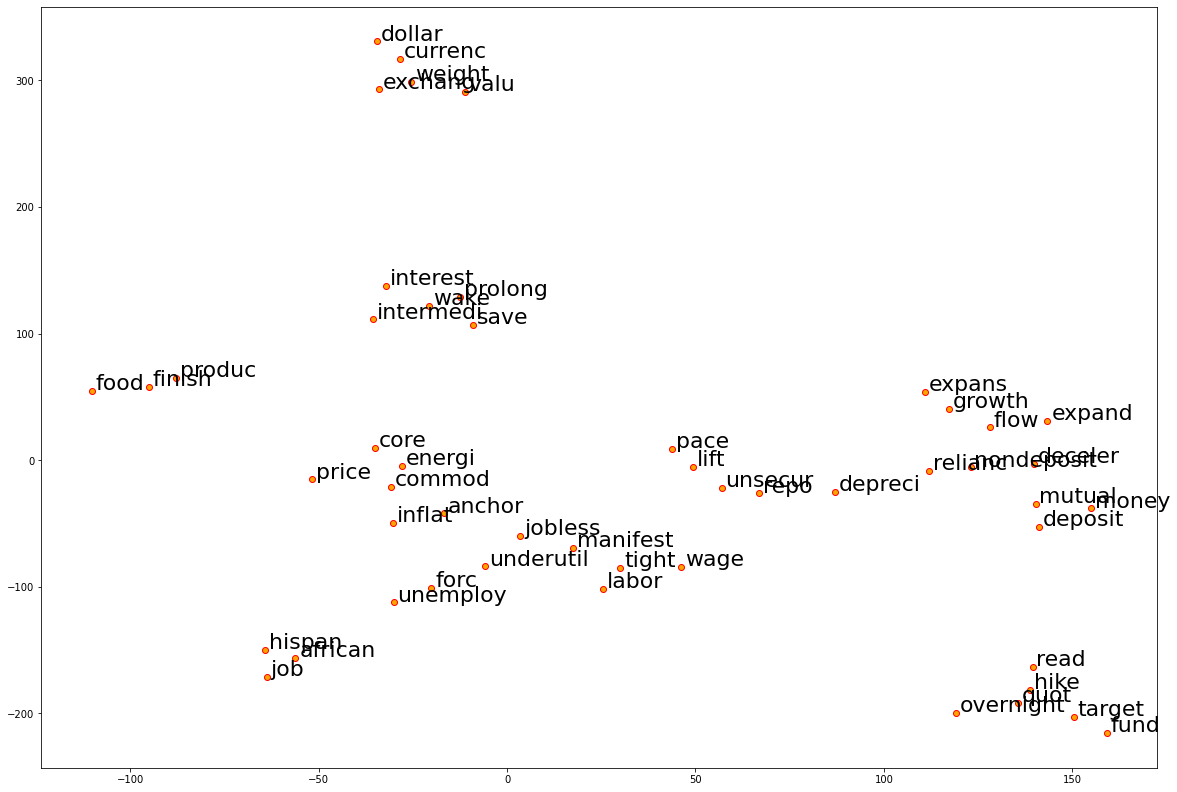

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words_2.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(20, 14))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', fontsize=22)

## 2-4 **Down**

### 2-4-1 *Word2Vec*

In [ ]:
from gensim.models import word2vec
import nltk

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in FOMC_pickle_down]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 2  # Minimum word count
# min_word_count = 10 for all corpus    
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

In [ ]:
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=20)] # topn=5
                  for search_term in ['inflat', 'price', 'growth', 'unemploy', 'labor', 'interest', 'money', 'fund', 'exchang']}
similar_words

{'exchang': ['dollar',
  'g',
  'depreci',
  'currenc',
  'foreign',
  'valu',
  'grow',
  'peso',
  'intervent',
  'partner',
  'major',
  'risen',
  'yen',
  'exposur',
  'concert',
  'diminut',
  'backdrop',
  'passthrough',
  'extern',
  'put'],
 'fund': ['certif',
  'effr',
  'target',
  'ioer',
  'overnight',
  'libor',
  'unsecur',
  'close',
  'oi',
  'interbank',
  'intraday',
  'london',
  'reserv',
  'accompani',
  'open',
  'paper',
  'assign',
  'cp',
  'intend',
  'governor'],
 'growth': ['expans',
  'expand',
  'pace',
  'gain',
  'recoveri',
  'restraint',
  'grew',
  'grown',
  'midpoint',
  'outpac',
  'upper',
  'assum',
  'downdraft',
  'activ',
  'diminut',
  'demonstr',
  'latin',
  'gradual',
  'aid',
  'risen'],
 'inflat': ['calcul',
  'anchor',
  'commod',
  'disinflationari',
  'transitori',
  'read',
  'drift',
  'quiescent',
  'core',
  'energi',
  'resourc',
  'slack',
  'mute',
  'firmli',
  'food',
  'tip',
  'pressur',
  'dalla',
  'upward',
  'softer'],

In [ ]:
similar_words_2 = {
 'exchang': ['dollar', 'g', 'depreci', 'currenc', 'valu'],
 'fund': ['target', 'effr', 'overnight', 'certif', 'ioer'],
 'growth': ['expans', 'pace', 'expand', 'midpoint', 'gain'],
 'inflat': ['disinflationari', 'calcul', 'anchor', 'firmli'],
 'interest': ['counter', 'refinanc', 'attract', 'intermedi', 'pent'],
 'labor': ['fill', 'wage', 'payrol', 'qualifi', 'evidenc'],
 'money': ['inflow', 'deposit', 'safeti', 'mutual', 'flight'],
 'price': ['food', 'headlin', 'stage', 'commod', 'pass'],
 'unemploy': ['popul', 'african', 'forc', 'workweek', 'civilian']}

In [ ]:
# 'unemploy': ['popul', 'african', 'civilian', 'workweek', 'forc', 'age', 'claim', 'group', 'hour', 'hispan', 'hurrican', 'job', 'white', 'steadi', 'insur']}

In [ ]:
 # 'unemploy': ['popul', 'african', 'age', 'civilian', 'workweek', 'forc', 'claim', 'hour', 'group', 'steadi', 'hispan', 'white', 'american', 'job', 'averag', 'insur', 'hurrican', 'payrol', 'employ', 'roughli']}

### 2-4-2 *Visualizing word embeddings*

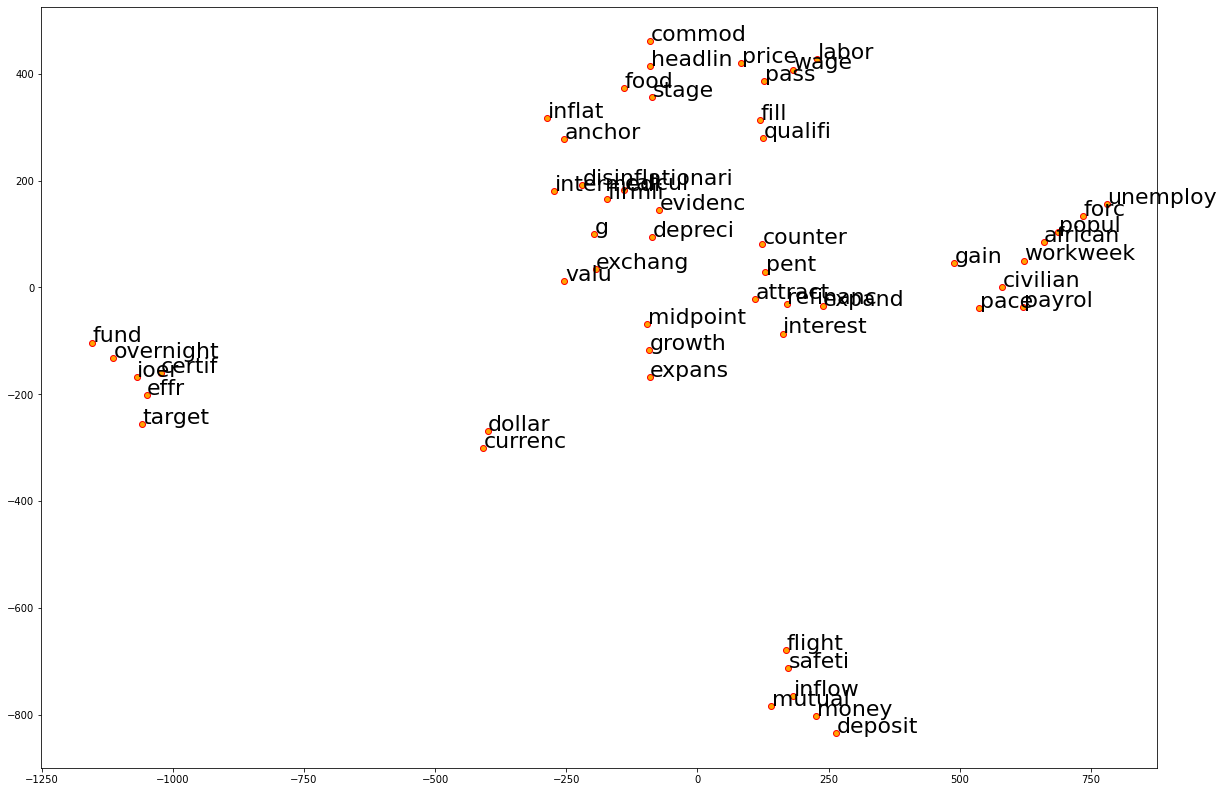

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words_2.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(20, 14))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', fontsize=22)

## 2-5 **Unchanged**

### 3-4-1 Word2Vec

In [ ]:
from gensim.models import word2vec
import nltk

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in FOMC_pickle_unchanged]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 5  # Minimum word count
# min_word_count = 10 for all corpus    
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

In [ ]:
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=20)] # topn=5
                  for search_term in ['inflat', 'price', 'growth', 'unemploy', 'labor', 'interest', 'money', 'fund', 'exchang']}
similar_words

{'exchang': ['depreci',
  'intermedi',
  'equiti',
  'british',
  'occur',
  'chair',
  'open',
  'substitut',
  'benchmark',
  'appreci',
  'swiss',
  'upsid',
  'garner',
  'day',
  'fulli',
  'pound',
  'counterbalanc',
  'line',
  'g',
  'confer'],
 'fund': ['reserv',
  'eurodollar',
  'quot',
  'aa',
  'ioer',
  'assign',
  'overnight',
  'primari',
  'decis',
  'minim',
  'ask',
  'exercis',
  'matur',
  'repurchas',
  'rrp',
  'intend',
  'liftoff',
  'entail',
  'paper',
  'repo'],
 'growth': ['expans',
  'gain',
  'recoveri',
  'pace',
  'expand',
  'grow',
  'drawdown',
  'activ',
  'crise',
  'uptrend',
  'bounceback',
  'accumul',
  'restraint',
  'perform',
  'spurt',
  'wildfir',
  'turn',
  'heat',
  'deceler',
  'demand'],
 'inflat': ['commod',
  'disinflationari',
  'core',
  'price',
  'anchor',
  'transitori',
  'disinfl',
  'stabl',
  'gasolin',
  'resourc',
  'dissip',
  'would',
  'wage',
  'expect',
  'pass',
  'energi',
  'predomin',
  'import',
  'slack',
  'fo

In [ ]:
similar_words_2 = {
 'exchang': ['depreci', 'equiti', 'intermedi', 'power', 'chair'],
 'fund': ['assign', 'reserv', 'quot', 'oi', 'aa'],
 'growth': ['expans', 'recoveri', 'gain', 'expand', 'activ'],
 'inflat': ['commod', 'disinflationari', 'core', 'dissip', 'anchor'],
 'interest': ['jumbo', 'yield', 'intermedi', 'oi', 'save'],
 'labor': ['wage', 'reconcil', 'fill', 'suffici', 'worker'],
 'money': ['inflow', 'deposit', 'mutual', 'depositori', 'nonwithheld'],
 'price': ['food', 'headlin', 'non', 'item', 'pass'],
 'unemploy': ['forc', 'popul', 'age', 'hire', 'workweek']}

In [ ]:
# 'unemploy': ['forc', 'age', 'popul', 'hire', 'workweek', 'jobless', 'weekli', 'fill', 'unus', 'addendum', 'underutil', 'job', 'payrol', 'manifest', 'share']}

In [ ]:
# 'unemploy': ['forc', 'popul', 'age', 'workweek', 'hire', 'jobless', 'delinqu', 'work', 'addendum', 'save', 'lengthi', 'weekli', 'worker', 'job', 'reason', 'suspend', 'manifest', 'interest', 'payrol', 'durat']}

### 3-4-2 Visualizing word embeddings

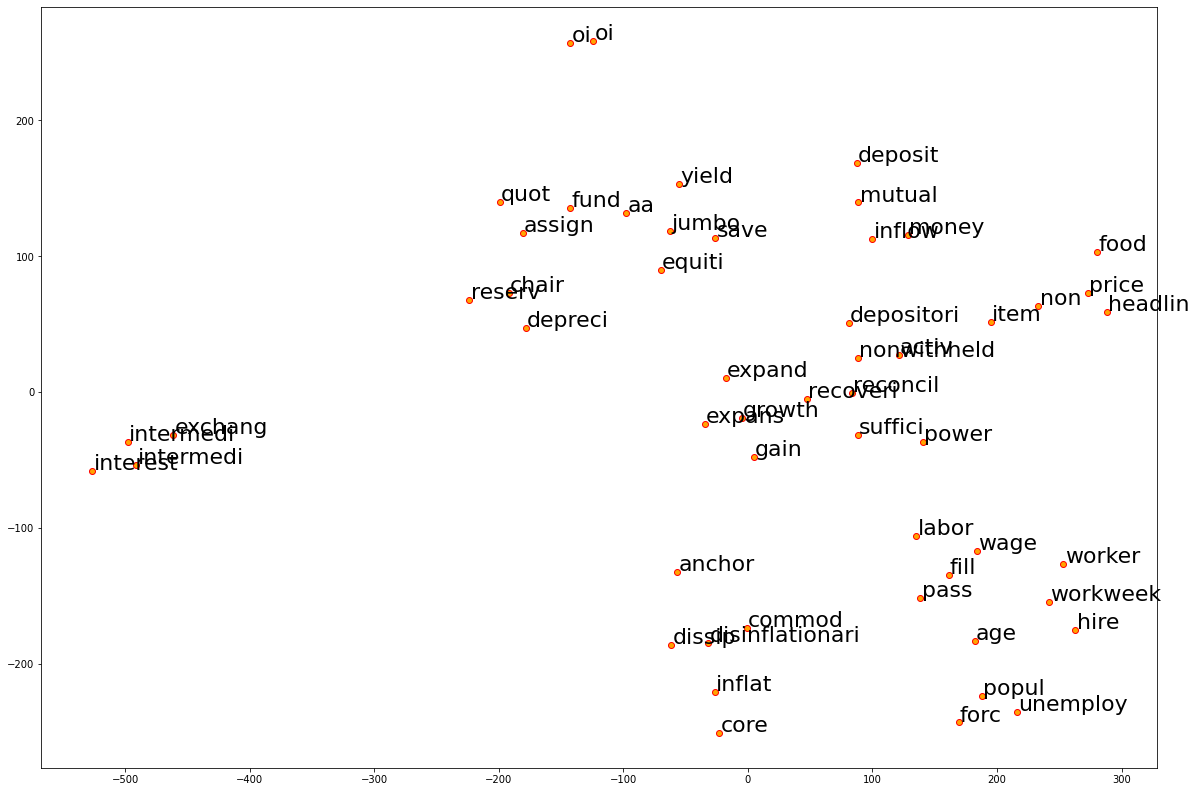

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words_2.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(20, 14))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', fontsize=22)

# (3) Classification

In [ ]:
# Run (1) & 2-2 before running this section

print(up_index); print(down_index); print(unchanged_index)

[8, 9, 10, 12, 14, 16, 33, 51, 52, 54, 56, 57, 58, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 183, 191, 193, 195, 199, 201, 203, 205, 207]
[19, 23, 24, 45, 46, 63, 64, 65, 66, 67, 68, 69, 70, 71, 78, 83, 117, 118, 119, 120, 121, 122, 125, 126, 127, 212, 213, 214, 216, 217]
[0, 1, 2, 3, 4, 5, 6, 7, 11, 13, 15, 17, 18, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 53, 55, 59, 60, 61, 62, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 108, 109, 110, 111, 112, 113, 114, 115, 116, 123, 124, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 192, 194, 196, 197, 198, 200, 202, 204, 206, 208, 209, 210, 211, 215, 218, 219, 220, 22

In [ ]:
print(np.array(fund_rate_change[24:246])[up_index])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [ ]:
print(np.array(fund_rate_change[24:246])[down_index])

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


In [ ]:
print(np.array(fund_rate_change[24:246])[unchanged_index])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [ ]:
fund_rate_change[0:5]

[0, 0, 0, -1, 0]

In [ ]:
fund_rate_change[1:5]

[0, 0, -1, 0]

In [ ]:
fund_rate_change[245]

0

In [ ]:
print(len(fund_rate_change))
fund_rate_change_2 = fund_rate_change[24:246]
print(len(fund_rate_change))

246
246


In [ ]:
# sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

from sklearn.model_selection import train_test_split

train_corpus, test_corpus, train_label_nums, test_label_nums =\
                                 train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                  test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000


In [ ]:
print(len(train_corpus)); print(len(test_corpus)); print()
print(len(train_label_nums)); print(len(test_label_nums))

177
45

177
45


In [ ]:
from collections import Counter

trd = dict(Counter(train_label_nums))
tsd = dict(Counter(test_label_nums))

(pd.DataFrame([[key, trd[key], tsd[key]] for key in trd], 
             columns=['Target Label', 'Train Count', 'Test Count'])
.sort_values(by=['Train Count', 'Test Count'],
             ascending=False))

,Target Label,Train Count,Test Count
0,0,122,31
1,1,31,8
2,-1,24,6


In [ ]:
'''
# 1.5 times filter (331 vocs)

A = ['rise', 'energi', 'higher', 'strong', 'cost', 'sustain', 'tighten', 'februari', 'solid', 'robust', 'need', 'action', 'boost', 'rais', 'bit', 'hurrican', 'post', 'underli', 'probabl', 'acceler', 'alreadi', 'anecdot', 'contain', 'twelv', 'surg', 'upsid', 'grow', 'weather', 'materi', 'remov', 'roughli', 'inflationari', 'pass', 'district', 'brisk', 'margin', 'believ', 'circumst', 'compon', 'owe', 'momentum', 'process', 'effort', 'grew', 'far', 'natur', 'depreci', 'save', 'eme', 'fairli', 'briskli', 'symmetr', 'requir', 'buildup', 'veloc', 'season', 'evolv', 'preced', 'percentag', 'fundament', 'slight', 'lag', 'jump', 'afe', 'languag', 'wane', 'curv', 'importantli', 'al', 'add', 'character', 'shortag', 'ga', 'neutral', 'increasingli', 'flatten', 'remark', 'tendenc', 'transport', 'opportun', 'portion', 'attain', 'constraint', 'individu', 'imbal', 'discount', 'statist', 'driven', 'acknowledg', 'rebuild', 'technolog', 'vigor', 'unseason', 'warm', 'abil', 'exampl', 'buoy', 'policymak', 'governor', 'workweek', 'equal']
B = ['declin', 'improv', 'secur', 'bank', 'credit', 'maintain', 'spread', 'reduc', 'loan', 'fell', 'august', 'purchas', 'weak', 'provid', 'state', 'agenc', 'sharpli', 'issuanc', 'drop', 'emerg', 'commerci', 'global', 'asset', 'significantli', 'decreas', 'reduct', 'liquid', 'desk', 'situat', 'advers', 'fall', 'stabl', 'downward', 'sheet', 'grade', 'standard', 'maximum', 'euro', 'categori', 'contract', 'billion', 'japan', 'temporari', 'eas', 'weigh', 'sluggish', 'plan', 'extend', 'recoveri', 'subsequ', 'weaken', 'weaker', 'better', 'local', 'estat', 'gross', 'insur', 'issu', 'lend', 'flow', 'public', 'institut', 'make', 'broader']

C = ['eas', 'weak', 'septemb', 'export', 'octob', 'august', 'basi', 'reduc', 'action', 'prospect', 'fell', 'major', 'drop', 'downsid', 'liquid', 'sharpli', 'reduct', 'help', 'deterior', 'weaken', 'contract', 'foster', 'deceler', 'anecdot', 'alreadi', 'strain', 'weaker', 'promot', 'institut', 'sharp', 'advers', 'money', 'led', 'soften', 'stimulu', 'facil', 'tech', 'wealth', 'sluggish', 'stress', 'neg', 'week', 'headlin', 'notic', 'summer', 'excess', 'weight', 'prefer', 'implement', 'soft', 'immedi', 'insur', 'loss', 'day', 'damp', 'disrupt', 'paper', 'tighter', 'cut', 'sourc', 'overnight', 'function', 'effort', 'mid', 'stem', 'intensifi', 'experienc', 'primari', 'board', 'propos', 'downturn', 'turmoil', 'slight', 'coronaviru', 'act', 'partner', 'fallen', 'upturn', 'lag', 'heighten', 'outbreak', 'latest', 'correct', 'taken', 'tension', 'discount', 'surround', 'pronounc', 'difficulti', 'auction', 'worsen', 'combin', 'clearli', 'repo', 'intend', 'recogn', 'abat', 'event', 'cutback', 'stimul', 'strike', 'disappoint', 'opportun', 'homebuild', 'delay', 'statist', 'approv', 'ampl', 'overhang', 'technolog']
D = ['labor', 'pace', 'chang', 'rise', 'staff', 'longer', 'unemploy', 'run', 'improv', 'object', 'net', 'accommod', 'purchas', 'maintain', 'compens', 'expand', 'june', 'april', 'assess', 'govern', 'pick', 'contribut', 'contact', 'recoveri', 'forward', 'gradual', 'matur', 'close', 'progress', 'coupl', 'begin', 'slack', 'region', 'forc', 'stronger', 'weather', 'program', 'depend', 'receiv', 'upsid', 'hire', 'medium', 'larger', 'respond', 'maximum', 'thought', 'warrant', 'gross']

E = ['declin', 'financi', 'eas', 'credit', 'weak', 'bank', 'septemb', 'august', 'basi', 'reduc', 'fell', 'major', 'drop', 'downsid', 'liquid', 'come', 'spread', 'sharpli', 'reduct', 'provid', 'loan', 'help', 'weaken', 'ahead', 'contract', 'state', 'global', 'commerci', 'emerg', 'decreas', 'deceler', 'sentiment', 'weaker', 'promot', 'asset', 'institut', 'advers', 'lend', 'significantli', 'money', 'fall', 'led', 'announc', 'soften', 'stimulu', 'grade', 'downward', 'sluggish', 'neg', 'affect', 'week', 'headlin', 'notic', 'summer', 'sheet', 'aircraft', 'prefer', 'central', 'soft', 'insur', 'standard', 'weigh', 'recoveri', 'day', 'billion', 'extend', 'slowli', 'japan', 'overnight', 'nondefens', 'experienc', 'better', 'board', 'propos', 'fallen', 'estat']
F = ['increas', 'labor', 'pace', 'energi', 'chang', 'rise', 'gain', 'longer', 'higher', 'run', 'cost', 'object', 'sustain', 'accommod', 'februari', 'need', 'compens', 'tighten', 'advanc', 'expand', 'solid', 'strengthen', 'april', 'assess', 'boost', 'pick', 'path', 'deficit', 'contribut', 'contact', 'upward', 'rais', 'nonfarm', 'gradual', 'underli', 'close', 'tax', 'tend', 'acceler', 'inflationari', 'slack', 'forc', 'stronger', 'roughli', 'weather', 'depend', 'margin', 'upsid', 'brisk', 'perhap', 'hire', 'natur', 'fairli', 'medium', 'larger', 'respond', 'date', 'buildup', 'thu']

voc_1_5_filter = set(A+B+C+D+E+F)

print(len(voc_1_5_filter))

'''

311


In [ ]:
'''

# 1.3 times filter (464 vocs)

A = ['percent', 'rise', 'energi', 'higher', 'pressur', 'gain', 'strong', 'averag', 'cost', 'fourth', 'core', 'sustain', 'accommod', 'tighten', 'februari', 'possibl', 'aggreg', 'solid', 'robust', 'need', 'gradual', 'action', 'util', 'basi', 'boost', 'despit', 'rais', 'oper', 'contribut', 'bit', 'hurrican', 'post', 'rapid', 'underli', 'close', 'produc', 'probabl', 'acceler', 'upward', 'alreadi', 'anecdot', 'degre', 'nonfarm', 'contain', 'twelv', 'outlay', 'surg', 'upsid', 'grow', 'weather', 'materi', 'remov', 'build', 'tend', 'roughli', 'inflationari', 'pass', 'district', 'softwar', 'depend', 'brisk', 'widespread', 'margin', 'believ', 'circumst', 'compon', 'respond', 'perhap', 'owe', 'tech', 'momentum', 'process', 'effort', 'accumul', 'date', 'grew', 'far', 'natur', 'set', 'depreci', 'regist', 'retain', 'save', 'eme', 'fairli', 'briskli', 'symmetr', 'strongli', 'requir', 'buildup', 'veloc', 'season', 'evolv', 'preced', 'percentag', 'fundament', 'slight', 'drill', 'lag', 'hour', 'jump', 'afe', 'languag', 'wane', 'partial', 'curv', 'importantli', 'al', 'add', 'character', 'shortag', 'partner', 'gasolin', 'ga', 'neutral', 'increasingli', 'flatten', 'remark', 'tendenc', 'transport', 'opportun', 'accompani', 'portion', 'attain', 'pattern', 'actual', 'constraint', 'individu', 'concentr', 'imbal', 'discount', 'statist', 'driven', 'acknowledg', 'rebuild', 'technolog', 'vigor', 'unseason', 'warm', 'abil', 'exampl', 'minut', 'buoy', 'budget', 'policymak', 'governor', 'backdrop', 'workweek', 'equal', 'attribut', 'presid']
B = ['declin', 'financi', 'staff', 'improv', 'secur', 'mortgag', 'juli', 'treasuri', 'bank', 'net', 'credit', 'june', 'septemb', 'maintain', 'bond', 'spread', 'fiscal', 'fomc', 'reduc', 'unchang', 'loan', 'fell', 'august', 'purchas', 'govern', 'weak', 'provid', 'subdu', 'state', 'agenc', 'sharpli', 'issuanc', 'investor', 'sentiment', 'drop', 'emerg', 'commerci', 'matur', 'commun', 'global', 'asset', 'significantli', 'decreas', 'progress', 'reduct', 'narrow', 'liquid', 'desk', 'situat', 'begin', 'advers', 'fall', 'stabl', 'downward', 'affect', 'sheet', 'grade', 'central', 'standard', 'reportedli', 'maximum', 'euro', 'notic', 'shift', 'warrant', 'categori', 'contract', 'billion', 'japan', 'temporari', 'slowli', 'eas', 'weigh', 'outcom', 'sluggish', 'offic', 'plan', 'extend', 'nondefens', 'recoveri', 'subsequ', 'weaken', 'share', 'weaker', 'size', 'better', 'local', 'estat', 'gross', 'insur', 'issu', 'variou', 'lend', 'flow', 'prefer', 'face', 'public', 'institut', 'overnight', 'accordingli', 'experienc', 'make', 'broader', 'tilt']

C = ['economi', 'fund', 'reserv', 'eas', 'point', 'credit', 'weak', 'inventori', 'high', 'trade', 'septemb', 'export', 'octob', 'capit', 'core', 'august', 'basi', 'reduc', 'avail', 'action', 'prospect', 'fell', 'major', 'drop', 'downsid', 'stock', 'liquid', 'futur', 'sharpli', 'reduct', 'provid', 'relat', 'evid', 'help', 'deterior', 'weaken', 'ahead', 'confid', 'contract', 'notabl', 'global', 'foster', 'moreov', 'ratio', 'deceler', 'anecdot', 'alreadi', 'strain', 'weaker', 'promot', 'suppli', 'institut', 'sharp', 'advers', 'lend', 'money', 'fall', 'led', 'announc', 'perform', 'soften', 'stimulu', 'borrow', 'facil', 'grade', 'downward', 'tech', 'wealth', 'sluggish', 'stress', 'neg', 'materi', 'consumpt', 'affect', 'turn', 'week', 'softwar', 'profit', 'headlin', 'notic', 'summer', 'excess', 'weight', 'aircraft', 'prefer', 'implement', 'deposit', 'soft', 'immedi', 'insur', 'loss', 'weigh', 'inde', 'day', 'look', 'damp', 'disrupt', 'paper', 'circumst', 'tighter', 'cut', 'sourc', 'overnight', 'believ', 'desir', 'function', 'mark', 'effort', 'mid', 'stem', 'intensifi', 'experienc', 'primari', 'board', 'refer', 'propos', 'downturn', 'turmoil', 'slight', 'coronaviru', 'automot', 'act', 'ad', 'partner', 'fallen', 'consequ', 'upturn', 'lag', 'heighten', 'uncertain', 'outbreak', 'latest', 'correct', 'taken', 'tension', 'discount', 'surround', 'pronounc', 'intermedi', 'symmetr', 'difficulti', 'auction', 'worsen', 'outsid', 'combin', 'vulner', 'clearli', 'repo', 'intend', 'wholesal', 'place', 'recogn', 'abat', 'event', 'cutback', 'percentag', 'stimul', 'strike', 'disappoint', 'outstand', 'opportun', 'homebuild', 'upper', 'delay', 'statist', 'approv', 'al', 'ampl', 'overhang', 'technolog']
D = ['increas', 'labor', 'pace', 'low', 'chang', 'rise', 'employ', 'project', 'secur', 'gain', 'staff', 'longer', 'unemploy', 'higher', 'run', 'survey', 'cost', 'improv', 'loan', 'object', 'factor', 'net', 'nomin', 'accommod', 'purchas', 'march', 'februari', 'total', 'maintain', 'compens', 'tighten', 'advanc', 'fiscal', 'asset', 'expand', 'appropri', 'solid', 'base', 'strengthen', 'agenc', 'june', 'april', 'assess', 'nonfinanci', 'worker', 'modest', 'subdu', 'wage', 'govern', 'review', 'pick', 'path', 'deficit', 'contribut', 'contrast', 'contact', 'situat', 'restraint', 'rais', 'recoveri', 'forward', 'narrow', 'nonfarm', 'gradual', 'matur', 'underli', 'close', 'tax', 'euro', 'modestli', 'progress', 'acceler', 'coupl', 'begin', 'slack', 'reportedli', 'region', 'forc', 'issu', 'stronger', 'roughli', 'payment', 'weather', 'program', 'depend', 'margin', 'receiv', 'upsid', 'brisk', 'perhap', 'reach', 'hire', 'dealer', 'medium', 'larger', 'respond', 'maximum', 'thought', 'date', 'warrant', 'gross', 'princip', 'establish', 'thu']

E = ['declin', 'financi', 'activ', 'fund', 'reserv', 'sale', 'eas', 'credit', 'weak', 'inventori', 'bank', 'septemb', 'export', 'lower', 'octob', 'substanti', 'capit', 'mani', 'august', 'basi', 'mortgag', 'reduc', 'addit', 'avail', 'action', 'fell', 'motor', 'major', 'drop', 'downsid', 'stock', 'liquid', 'come', 'spread', 'sharpli', 'reduct', 'provid', 'loan', 'half', 'help', 'weaken', 'ahead', 'contract', 'notabl', 'purchas', 'light', 'state', 'global', 'commerci', 'financ', 'emerg', 'foster', 'sizabl', 'moreov', 'decreas', 'ratio', 'deceler', 'sentiment', 'weaker', 'promot', 'asset', 'issuanc', 'institut', 'short', 'advers', 'lend', 'investor', 'significantli', 'money', 'revis', 'fall', 'led', 'announc', 'perform', 'residenti', 'soften', 'stimulu', 'borrow', 'nonetheless', 'grade', 'downward', 'tech', 'wealth', 'sluggish', 'neg', 'affect', 'turn', 'week', 'profit', 'headlin', 'notic', 'summer', 'weight', 'sheet', 'lead', 'aircraft', 'prefer', 'central', 'deposit', 'soft', 'insur', 'standard', 'weigh', 'recoveri', 'day', 'damp', 'disrupt', 'billion', 'extend', 'slowli', 'japan', 'euro', 'shift', 'overnight', 'desir', 'nondefens', 'experienc', 'temporari', 'better', 'board', 'refer', 'propos', 'plan', 'fallen', 'consequ', 'estat', 'uncertain', 'discount', 'issu', 'tilt', 'public', 'clearli']
F = ['inflat', 'increas', 'polici', 'expect', 'percent', 'labor', 'pace', 'energi', 'chang', 'rise', 'strong', 'fourth', 'gain', 'longer', 'unemploy', 'higher', 'run', 'cost', 'januari', 'object', 'possibl', 'sustain', 'nomin', 'accommod', 'long', 'robust', 'februari', 'total', 'need', 'util', 'trend', 'compens', 'tighten', 'advanc', 'seen', 'expand', 'despit', 'appropri', 'solid', 'base', 'strengthen', 'june', 'april', 'assess', 'strength', 'boost', 'broad', 'worker', 'rapid', 'express', 'bit', 'review', 'post', 'probabl', 'pick', 'path', 'deficit', 'contribut', 'degre', 'contact', 'upward', 'restraint', 'rais', 'exchang', 'forward', 'capac', 'surg', 'nonfarm', 'gradual', 'underli', 'close', 'tax', 'partli', 'believ', 'tend', 'rapidli', 'modestli', 'acceler', 'inflationari', 'return', 'durabl', 'coupl', 'necessari', 'slack', 'region', 'forc', 'far', 'accumul', 'stronger', 'regist', 'roughli', 'payment', 'weather', 'grew', 'depend', 'margin', 'receiv', 'requir', 'upsid', 'benefit', 'brisk', 'perhap', 'reach', 'hire', 'natur', 'fairli', 'medium', 'larger', 'respond', 'thought', 'date', 'princip', 'buildup', 'establish', 'thu']

voc_1_3_filter = set(A+B+C+D+E+F)

print(len(voc_1_3_filter))

'''

464


In [ ]:
# 1.7 times filter (210 vocs)

A = ['tighten', 'need', 'rais', 'hurrican', 'underli', 'contain', 'upsid', 'weather', 'remov', 'inflationari', 'pass', 'brisk', 'margin', 'believ', 'owe', 'momentum', 'process', 'effort', 'grew', 'save', 'eme', 'symmetr', 'requir', 'buildup', 'evolv', 'percentag', 'fundament', 'jump', 'afe', 'curv', 'al', 'add', 'shortag', 'ga', 'neutral', 'increasingli', 'flatten', 'remark', 'tendenc', 'attain', 'constraint', 'imbal', 'discount', 'acknowledg', 'rebuild', 'technolog', 'vigor', 'unseason', 'warm', 'exampl', 'buoy', 'policymak', 'workweek', 'equal']
B = ['secur', 'bank', 'credit', 'loan', 'august', 'purchas', 'weak', 'agenc', 'drop', 'commerci', 'asset', 'decreas', 'reduct', 'liquid', 'fall', 'stabl', 'standard', 'euro', 'contract', 'billion', 'japan', 'eas', 'extend', 'recoveri', 'weaken', 'weaker', 'better', 'estat', 'gross', 'issu', 'lend', 'institut', 'broader']

C = ['eas', 'weak', 'septemb', 'basi', 'action', 'drop', 'downsid', 'liquid', 'sharpli', 'reduct', 'help', 'deterior', 'weaken', 'contract', 'deceler', 'anecdot', 'alreadi', 'strain', 'weaker', 'promot', 'institut', 'led', 'soften', 'stimulu', 'facil', 'tech', 'sluggish', 'stress', 'neg', 'week', 'headlin', 'summer', 'excess', 'prefer', 'loss', 'day', 'paper', 'tighter', 'sourc', 'function', 'stem', 'intensifi', 'primari', 'board', 'propos', 'downturn', 'turmoil', 'slight', 'coronaviru', 'act', 'partner', 'fallen', 'upturn', 'heighten', 'outbreak', 'correct', 'taken', 'tension', 'discount', 'surround', 'pronounc', 'auction', 'worsen', 'combin', 'repo', 'intend', 'recogn', 'abat', 'cutback', 'stimul', 'strike', 'disappoint', 'approv', 'ampl', 'overhang', 'technolog']
D = ['longer', 'unemploy', 'run', 'improv', 'purchas', 'expand', 'june', 'april', 'contact', 'recoveri', 'forward', 'gradual', 'slack', 'stronger', 'program', 'hire', 'medium', 'maximum', 'warrant']

E = ['declin', 'financi', 'eas', 'credit', 'weak', 'bank', 'septemb', 'august', 'reduc', 'fell', 'drop', 'downsid', 'liquid', 'sharpli', 'reduct', 'provid', 'help', 'weaken', 'contract', 'global', 'commerci', 'emerg', 'decreas', 'weaker', 'promot', 'asset', 'institut', 'advers', 'lend', 'significantli', 'fall', 'led', 'soften', 'stimulu', 'grade', 'downward', 'sluggish', 'neg', 'affect', 'headlin', 'notic', 'summer', 'prefer', 'soft', 'insur', 'weigh', 'recoveri', 'extend', 'overnight', 'experienc']
F = ['increas', 'pace', 'energi', 'rise', 'gain', 'longer', 'higher', 'run', 'cost', 'sustain', 'accommod', 'februari', 'tighten', 'expand', 'solid', 'april', 'assess', 'contribut', 'contact', 'rais', 'nonfarm', 'gradual', 'underli', 'close', 'acceler', 'slack', 'forc', 'roughli', 'weather', 'depend', 'margin', 'upsid', 'brisk', 'perhap', 'hire', 'medium', 'larger', 'respond', 'date']

voc_1_7_filter = set(A+B+C+D+E+F)

print(len(voc_1_7_filter))

210


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

# build BOW features on train articles
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, vocabulary = voc_1_7_filter, ngram_range=(1, 1))
cv_train_features = cv.fit_transform(train_corpus)

In [ ]:
# transform test articles into features
cv_test_features = cv.transform(test_corpus)

In [ ]:
# print(cv_train_features)

In [ ]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (177, 210)  Test features shape: (45, 210)


## Confusion matrix function

In [ ]:
from sklearn import metrics
import pandas as pd

def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex.from_product([['Predicted'], classes]), 
                            index=pd.MultiIndex.from_product([['Actual'], classes])) 
    '''
    cm_frame = pd.DataFrame(data=cm, 
                        columns=pd.MultiIndex.from_product(levels=[['Predicted:'], classes], 
                                              labels=level_labels), 
                        index=pd.MultiIndex.from_product(levels=[['Actual:'], classes], 
                                            labels=level_labels)) 
    '''
    print(cm_frame) 

In [ ]:
from sklearn import metrics
import pandas as pd

def display_confusion_matrix_pretty(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex.from_product([['Predicted'], classes]), 
                            index=pd.MultiIndex.from_product([['Actual'], classes])) 
    return cm_frame

## LR

In [ ]:
'''

param_grid = [
    {
        "preprocesser__num_transform__imputer__strategy": ["mean", "median"],
        "classifier__C": [0.1, 1.0, 10.0, 100.0],
        "classifier": [LogisticRegression()]
    }
]

grid_search = GridSearchCV(model, param_grid, cv=10, verbose=1,n_jobs=-1)
grid_search.fit(X_train, y_train)


param_grid = [
    {
        "preprocesser__num_transform__imputer__strategy": ["mean", "median"],
        "classifier__C": [0.1, 1.0, 10.0, 100.0],
        "classifier": [LogisticRegression()]
    },
    {
        "preprocesser__num_transform__imputer__strategy": ["mean", "median"],
        "classifier__n_estimators": [10, 100, 1000],
        "classifier": [RandomForestClassifier()]
    }
]
grid_search = GridSearchCV(model, param_grid, cv=10, verbose=1,n_jobs=-1)
grid_search.fit(X_train, y_train)

'''

In [ ]:
'''

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

train_ = np.zeros(10)
lr = LogisticRegression(penalty='l2', max_iter=8000, C=0.1, random_state=42)

for i in range(10):

  lr_bow_cv_scores = cross_val_score(lr, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  lr_bow_cv_mean_score = np.mean(lr_bow_cv_scores)
  print('CV Accuracy (5-fold):', lr_bow_cv_scores)
  print('Mean Training CV Accuracy:', lr_bow_cv_mean_score)

  train_[i] = lr_bow_cv_mean_score

lr.fit(cv_train_features, train_label_nums)
lr_bow_test_score = lr.score(cv_test_features, test_label_nums)

y_test_pred = lr.predict(cv_test_features)
cm = metrics.confusion_matrix(y_true=test_label_nums, y_pred=y_test_pred, 
                              labels=[-1,0,1])
print(cm)

print('----------')
print('Test Accuracy:', lr_bow_test_score)

'''

CV Accuracy (5-fold): [0.91666667 0.83333333 0.97142857 0.94285714 0.82857143]
Mean Training CV Accuracy: 0.8985714285714286
CV Accuracy (5-fold): [0.86111111 0.88888889 0.85714286 0.97142857 0.88571429]
Mean Training CV Accuracy: 0.8928571428571429
CV Accuracy (5-fold): [0.88888889 0.94444444 0.91428571 0.77142857 0.97142857]
Mean Training CV Accuracy: 0.8980952380952381
CV Accuracy (5-fold): [0.91666667 0.83333333 0.85714286 0.91428571 0.91428571]
Mean Training CV Accuracy: 0.8871428571428572
CV Accuracy (5-fold): [0.94444444 0.88888889 0.97142857 0.91428571 0.85714286]
Mean Training CV Accuracy: 0.9152380952380952
CV Accuracy (5-fold): [0.97222222 1.         0.85714286 0.94285714 0.88571429]
Mean Training CV Accuracy: 0.9315873015873016
CV Accuracy (5-fold): [0.88888889 0.86111111 0.91428571 0.8        0.88571429]
Mean Training CV Accuracy: 0.8699999999999999
CV Accuracy (5-fold): [0.86111111 0.94444444 0.91428571 0.88571429 0.74285714]
Mean Training CV Accuracy: 0.8696825396825396


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


lr_pipeline = Pipeline([('lr', LogisticRegression(penalty='l2', max_iter=8000, random_state=42))])

param_grid = {'lr__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0, 100.0]}

gs_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, verbose=1)
gs_lr = gs_lr.fit(cv_train_features, train_label_nums)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   11.3s finished


In [ ]:
gs_lr.best_estimator_.get_params()

{'lr': LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=8000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'lr__C': 5,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 8000,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': 42,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'memory': None,
 'steps': [('lr',
   LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=8000,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=42, solver='lbfgs', tol=0.0

In [ ]:
cv_results = gs_lr.cv_results_
results_df = pd.DataFrame({'rank': cv_results['rank_test_score'],
                           'params': cv_results['params'], 
                           'cv score (mean)': cv_results['mean_test_score'], 
                           'cv score (std)': cv_results['std_test_score']}
                          )

results_df = results_df.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_df

,rank,params,cv score (mean),cv score (std)
3,1,{'lr__C': 0.1},0.847302,0.029817
2,2,{'lr__C': 0.05},0.841746,0.029310
1,3,{'lr__C': 0.01},0.836190,0.048807
6,4,{'lr__C': 10.0},0.836190,0.027701
4,5,{'lr__C': 0.5},0.830476,0.031385
5,5,{'lr__C': 1.0},0.830476,0.031385
7,7,{'lr__C': 100.0},0.824921,0.032814
0,8,{'lr__C': 0.001},0.813333,0.052984


In [ ]:
best_lr_test_score = gs_lr.score(cv_test_features, test_label_nums)
print('Test Accuracy :', best_lr_test_score)

Test Accuracy : 0.9555555555555556


In [ ]:
# Confusion matrix 01
from sklearn.metrics import classification_report

y_test_pred = gs_lr.predict(cv_test_features)

print(classification_report(test_label_nums, y_test_pred))

              precision    recall  f1-score   support

          -1       1.00      0.83      0.91         6
           0       0.94      1.00      0.97        31
           1       1.00      0.88      0.93         8

    accuracy                           0.96        45
   macro avg       0.98      0.90      0.94        45
weighted avg       0.96      0.96      0.95        45



In [ ]:
# Confusion matrix 02

# display_confusion_matrix(true_labels=test_label_nums, predicted_labels=y_test_pred, classes=[-1, 0, 1])

display_confusion_matrix_pretty(true_labels=test_label_nums, predicted_labels=y_test_pred, classes=[-1, 0, 1])

Predicted       
                 -1   0  1
Actual -1         5   1  0
        0         0  31  0
        1         0   1  7

In [ ]:
'''
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

mnb_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                        ('mnb', MultinomialNB())
                       ])

param_grid = {'tfidf__ngram_range': [(1, 1), (1, 2)],
              'mnb__alpha': [1e-5, 1e-4, 1e-2, 1e-1, 1]
}

gs_mnb = GridSearchCV(mnb_pipeline, param_grid, cv=5, verbose=2)
gs_mnb = gs_mnb.fit(train_corpus, train_label_names)



from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

lr_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                        ('lr', LogisticRegression(penalty='l2', max_iter=100, random_state=42))
                       ])

param_grid = {'tfidf__ngram_range': [(1, 1), (1, 2)],
              'lr__C': [1, 5, 10]
}

gs_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, verbose=2)
gs_lr = gs_lr.fit(train_corpus, train_label_names)



from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

svm_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                        ('svm', LinearSVC(random_state=42))
                       ])

param_grid = {'tfidf__ngram_range': [(1, 1), (1, 2)],
              'svm__C': [0.01, 0.1, 1, 5]
}

gs_svm = GridSearchCV(svm_pipeline, param_grid, cv=5, verbose=2)
gs_svm = gs_svm.fit(train_corpus, train_label_names)



from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

sgd_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                        ('sgd', SGDClassifier(random_state=42))
                       ])

param_grid = {'tfidf__ngram_range': [(1, 1), (1, 2)],
              'sgd__alpha': [1e-7, 1e-6, 1e-5, 1e-4]
}

gs_sgd = GridSearchCV(sgd_pipeline, param_grid, cv=5, verbose=2)
gs_sgd = gs_sgd.fit(train_corpus, train_label_names)

In [ ]:
'''
y_test_pred = lr.predict(cv_test_features)
cm = metrics.confusion_matrix(y_true=test_label_nums, y_pred=y_test_pred, 
                              labels=[-1, 0, 1])
print(cm)

display_confusion_matrix(true_labels=test_label_nums, predicted_labels=y_test_pred, classes=[-1, 0, 1])

display_confusion_matrix_pretty(true_labels=test_label_nums, predicted_labels=y_test_pred, classes=[-1, 0, 1])



# 多分類的 F1-score
# https://zhuanlan.zhihu.com/p/147663370

from sklearn.metrics import classification_report
print(classification_report(test_label_nums, y_test_pred))

'''

[[ 6  0  0]
 [ 0 30  1]
 [ 0  5  3]]


In [ ]:
'''
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

'''

In [ ]:
'''
# C = 0.1

print(train_.shape)
print(type(train_))
print('----------')

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')
print('----------')

print(f'Test accuracy = {lr_bow_test_score:.4f}')

'''

(10,)
<class 'numpy.ndarray'>
----------
Training accuracy (mean)   = 0.8966
Training accuracy (median) = 0.8982
----------
Test accuracy = 0.8667


## SVM

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC


svm_pipeline = Pipeline([('svm', SVC(kernel='rbf'))])

param_grid = {'svm__gamma': [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 0, 1, 10],
              'svm__C': [0.1, 1.0, 10, 100, 300, 320, 350, 400, 450, 500, 600]}

gs_svm = GridSearchCV(svm_pipeline, param_grid, cv=5, verbose=1)
gs_svm = gs_svm.fit(cv_train_features, train_label_nums)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:   16.1s finished


In [ ]:
gs_svm.best_estimator_.get_params()

{'memory': None,
 'steps': [('svm',
   SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
       max_iter=-1, probability=False, random_state=None, shrinking=True,
       tol=0.001, verbose=False))],
 'svm': SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'svm__C': 10,
 'svm__break_ties': False,
 'svm__cache_size': 200,
 'svm__class_weight': None,
 'svm__coef0': 0.0,
 'svm__decision_function_shape': 'ovr',
 'svm__degree': 3,
 'svm__gamma': 0.0001,
 'svm__kernel': 'rbf',
 'svm__max_iter': -1,
 'svm__probability': False,
 'svm__random_state': None,
 'svm__shrinking': True,
 'svm__tol': 0.001,
 'svm__verbose': False,
 'verbose': False}

In [ ]:
cv_results = gs_svm.cv_results_
results_df = pd.DataFrame({'rank': cv_results['rank_test_score'],
                           'params': cv_results['params'], 
                           'cv score (mean)': cv_results['mean_test_score'], 
                           'cv score (std)': cv_results['std_test_score']}
                          )

results_df = results_df.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_df

,rank,params,cv score (mean),cv score (std)
20,1,"{'svm__C': 10, 'svm__gamma': 0.0001}",0.847460,0.070546
28,2,"{'svm__C': 100, 'svm__gamma': 1e-05}",0.841905,0.063282
57,3,"{'svm__C': 350, 'svm__gamma': 0.001}",0.841587,0.039273
21,3,"{'svm__C': 10, 'svm__gamma': 0.001}",0.841587,0.039273
39,3,"{'svm__C': 300, 'svm__gamma': 0.001}",0.841587,0.039273
...,...,...,...,...
31,37,"{'svm__C': 100, 'svm__gamma': 0.01}",0.689206,0.004277
26,37,"{'svm__C': 10, 'svm__gamma': 10}",0.689206,0.004277
25,37,"{'svm__C': 10, 'svm__gamma': 1}",0.689206,0.004277
40,37,"{'svm__C': 300, 'svm__gamma': 0.01}",0.689206,0.004277


In [ ]:
best_svm_test_score = gs_svm.score(cv_test_features, test_label_nums)
print('Test Accuracy :', best_svm_test_score)

Test Accuracy : 0.9111111111111111


In [ ]:
'''

from sklearn.svm import SVC

train_ = np.zeros(10)
svc = SVC(kernel='rbf', gamma=1e-05, C=320) # gamma=1e-06, C=300 / gamma=1e-05, C=10

for i in range(10):

  svc_tfidf_cv_scores = cross_val_score(svc, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  svc_tfidf_cv_mean_score = np.mean(svc_tfidf_cv_scores)
  print('CV Accuracy (5-fold):', svc_tfidf_cv_scores)
  print('Mean Training CV Accuracy:', svc_tfidf_cv_mean_score)

  train_[i] = svc_tfidf_cv_mean_score

svc.fit(cv_train_features, train_label_nums)
svc_tfidf_test_score = svc.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', svc_tfidf_test_score)



# gamma=1e-05, C=300

print(train_.shape)
print(type(train_))
print('----------')

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')
print('----------')

print(f'Test accuracy = {svc_tfidf_test_score:.4f}')

CV Accuracy (5-fold): [0.88888889 0.88888889 0.97142857 0.85714286 0.82857143]
Mean Training CV Accuracy: 0.886984126984127
CV Accuracy (5-fold): [0.86111111 0.83333333 0.91428571 0.88571429 0.88571429]
Mean Training CV Accuracy: 0.8760317460317459
CV Accuracy (5-fold): [0.88888889 0.83333333 0.88571429 0.94285714 0.77142857]
Mean Training CV Accuracy: 0.8644444444444443
CV Accuracy (5-fold): [0.83333333 0.88888889 0.8        0.91428571 0.88571429]
Mean Training CV Accuracy: 0.8644444444444443
CV Accuracy (5-fold): [0.83333333 0.80555556 0.85714286 0.94285714 0.91428571]
Mean Training CV Accuracy: 0.8706349206349208
CV Accuracy (5-fold): [0.80555556 0.83333333 0.85714286 0.88571429 0.91428571]
Mean Training CV Accuracy: 0.8592063492063492
CV Accuracy (5-fold): [0.94444444 0.86111111 0.85714286 0.85714286 0.88571429]
Mean Training CV Accuracy: 0.881111111111111
CV Accuracy (5-fold): [0.86111111 0.88888889 0.82857143 0.85714286 0.97142857]
Mean Training CV Accuracy: 0.8814285714285715
CV

## RF

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=150, random_state=2020, criterion = "gini")

rfc_pipeline = Pipeline([('rfc', RandomForestClassifier(random_state=2020, criterion = "gini"))])  # gamma=1e-06, C=300 / gamma=1e-05, C=10

param_grid = {'rfc__n_estimators': [50, 100, 150, 260, 300, 500, 600, 700, 800, 1000, 1200]}

gs_rfc = GridSearchCV(rfc_pipeline, param_grid, cv=5, verbose=1)
gs_rfc = gs_rfc.fit(cv_train_features, train_label_nums)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   51.3s finished


In [ ]:
gs_rfc.best_estimator_.get_params()

{'memory': None,
 'rfc': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=800,
                        n_jobs=None, oob_score=False, random_state=2020,
                        verbose=0, warm_start=False),
 'rfc__bootstrap': True,
 'rfc__ccp_alpha': 0.0,
 'rfc__class_weight': None,
 'rfc__criterion': 'gini',
 'rfc__max_depth': None,
 'rfc__max_features': 'auto',
 'rfc__max_leaf_nodes': None,
 'rfc__max_samples': None,
 'rfc__min_impurity_decrease': 0.0,
 'rfc__min_impurity_split': None,
 'rfc__min_samples_leaf': 1,
 'rfc__min_samples_split': 2,
 'rfc__min_weight_fraction_leaf': 0.0,
 'rfc__n_estimators': 800,
 'rfc__n_

In [ ]:
cv_results = gs_rfc.cv_results_
results_df = pd.DataFrame({'rank': cv_results['rank_test_score'],
                           'params': cv_results['params'], 
                           'cv score (mean)': cv_results['mean_test_score'], 
                           'cv score (std)': cv_results['std_test_score']}
                          )

results_df = results_df.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)

results_df

,rank,params,cv score (mean),cv score (std)
8,1,{'rfc__n_estimators': 800},0.813651,0.033380
4,2,{'rfc__n_estimators': 300},0.807937,0.027346
6,2,{'rfc__n_estimators': 600},0.807937,0.027346
7,2,{'rfc__n_estimators': 700},0.807937,0.027346
9,2,{'rfc__n_estimators': 1000},0.807937,0.027346
10,2,{'rfc__n_estimators': 1200},0.807937,0.027346
3,7,{'rfc__n_estimators': 260},0.802222,0.025349
1,8,{'rfc__n_estimators': 100},0.796825,0.025678
2,9,{'rfc__n_estimators': 150},0.796667,0.032212
5,9,{'rfc__n_estimators': 500},0.796667,0.032212


In [ ]:
best_rfc_test_score = gs_rfc.score(cv_test_features, test_label_nums)
print('Test Accuracy :', best_rfc_test_score)

Test Accuracy : 0.7777777777777778


In [ ]:
'''

from sklearn.ensemble import RandomForestClassifier

train_ = np.zeros(10)
rfc = RandomForestClassifier(n_estimators=150, random_state=2020, criterion = "gini")

for i in range(10):

  rfc_bow_cv_scores = cross_val_score(rfc, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  rfc_bow_cv_mean_score = np.mean(rfc_bow_cv_scores)
  print('CV Accuracy (5-fold):', rfc_bow_cv_scores)
  print('Mean CV Accuracy:', rfc_bow_cv_mean_score)

  train_[i] = rfc_bow_cv_mean_score

rfc.fit(cv_train_features, train_label_nums)
rfc_bow_test_score = rfc.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', rfc_bow_test_score)



# n_estimators=150

print(train_.shape)
print(type(train_))
print('----------')

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')
print('----------')

print(f'Test accuracy = {rfc_bow_test_score:.4f}')

CV Accuracy (5-fold): [0.80555556 0.83333333 0.74285714 0.74285714 0.82857143]
Mean CV Accuracy: 0.7906349206349207
CV Accuracy (5-fold): [0.80555556 0.83333333 0.82857143 0.77142857 0.8       ]
Mean CV Accuracy: 0.8077777777777777
CV Accuracy (5-fold): [0.77777778 0.77777778 0.8        0.85714286 0.8       ]
Mean CV Accuracy: 0.8025396825396826
CV Accuracy (5-fold): [0.75       0.77777778 0.77142857 0.77142857 0.74285714]
Mean CV Accuracy: 0.7626984126984127
CV Accuracy (5-fold): [0.72222222 0.77777778 0.8        0.77142857 0.74285714]
Mean CV Accuracy: 0.7628571428571428
CV Accuracy (5-fold): [0.75       0.80555556 0.85714286 0.77142857 0.8       ]
Mean CV Accuracy: 0.7968253968253969
CV Accuracy (5-fold): [0.80555556 0.88888889 0.74285714 0.8        0.82857143]
Mean CV Accuracy: 0.8131746031746031
CV Accuracy (5-fold): [0.77777778 0.75       0.82857143 0.8        0.74285714]
Mean CV Accuracy: 0.7798412698412699
CV Accuracy (5-fold): [0.75       0.77777778 0.82857143 0.77142857 0.828

## XGBoost

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

# xgb = XGBClassifier(booster='gbtree', n_estimators=200, min_child_weight=1, gamma=0.5, subsample=0.8, colsample_bytree=0.6, max_depth=5, learning_rate=0.1, verbosity=1, random_state=42)

xgb_pipeline = Pipeline([('xgb', XGBClassifier(booster='gbtree', min_child_weight=1, verbosity=1, random_state=42))])

param_grid = {'xgb__n_estimators': [100, 200, 400],
              'xgb__gamma': [0],
              'xgb__min_child_weight': [1],
              'xgb__subsample': [0.5, 1.0],
              'xgb__colsample_bytree': [0.5, 1.0],
              'xgb__max_depth': [6],
              'xgb__learning_rate': [0.1, 0.3],
              'xgb__colsample_bytree': [0.5, 1.0],
              }

gs_xgb = GridSearchCV(xgb_pipeline, param_grid, cv=5, verbose=1)
gs_xgb = gs_xgb.fit(cv_train_features, train_label_nums)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   57.6s finished


In [ ]:
gs_xgb.best_estimator_.get_params()

{'memory': None,
 'steps': [('xgb',
   XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=1.0, gamma=0,
                 learning_rate=0.1, max_delta_step=0, max_depth=6,
                 min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
                 nthread=None, objective='multi:softprob', random_state=42,
                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                 silent=None, subsample=0.5, verbosity=1))],
 'verbose': False,
 'xgb': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1.0, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
               nthread=None, objective='multi:softprob', random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               

In [ ]:
cv_results = gs_xgb.cv_results_
results_df = pd.DataFrame({'rank': cv_results['rank_test_score'],
                           'params': cv_results['params'], 
                           'cv score (mean)': cv_results['mean_test_score'], 
                           'cv score (std)': cv_results['std_test_score']} 
                          )

results_df = results_df.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)

results_df

,rank,params,cv score (mean),cv score (std)
22,1,"{'xgb__colsample_bytree': 1.0, 'xgb__gamma': 0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 6, ...",0.864603,0.032256
9,2,"{'xgb__colsample_bytree': 0.5, 'xgb__gamma': 0, 'xgb__learning_rate': 0.3, 'xgb__max_depth': 6, ...",0.864444,0.032832
15,3,"{'xgb__colsample_bytree': 0.5, 'xgb__gamma': 0, 'xgb__learning_rate': 0.3, 'xgb__max_depth': 6, ...",0.864286,0.045575
7,3,"{'xgb__colsample_bytree': 0.5, 'xgb__gamma': 0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 6, ...",0.864286,0.041840
13,3,"{'xgb__colsample_bytree': 0.5, 'xgb__gamma': 0, 'xgb__learning_rate': 0.3, 'xgb__max_depth': 6, ...",0.864286,0.045575
2,6,"{'xgb__colsample_bytree': 0.5, 'xgb__gamma': 0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 6, ...",0.859048,0.038876
6,7,"{'xgb__colsample_bytree': 0.5, 'xgb__gamma': 0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 6, ...",0.859048,0.046523
12,7,"{'xgb__colsample_bytree': 0.5, 'xgb__gamma': 0, 'xgb__learning_rate': 0.3, 'xgb__max_depth': 6, ...",0.859048,0.034421
14,9,"{'xgb__colsample_bytree': 0.5, 'xgb__gamma': 0, 'xgb__learning_rate': 0.3, 'xgb__max_depth': 6, ...",0.858889,0.030493
20,9,"{'xgb__colsample_bytree': 1.0, 'xgb__gamma': 0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 6, ...",0.858889,0.039785


In [ ]:
best_xgb_test_score = gs_xgb.score(cv_test_features, test_label_nums)
print('Test Accuracy :', best_xgb_test_score)

Test Accuracy : 0.8444444444444444


In [ ]:
'''
from xgboost import XGBClassifier
train_ = np.zeros(10)
xgb = XGBClassifier(booster='gbtree', n_estimators=200, min_child_weight=1, gamma=0.5, subsample=0.8, colsample_bytree=0.6, max_depth=5,
                    learning_rate=0.1, verbosity=1, random_state=42)

for i in range(10):

  xgb_bow_cv_scores = cross_val_score(xgb, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  xgb_bow_cv_mean_score = np.mean(xgb_bow_cv_scores)
  print('CV Accuracy (5-fold):', xgb_bow_cv_scores)
  print('Mean CV Accuracy:', xgb_bow_cv_mean_score)

  train_[i] = xgb_bow_cv_mean_score

xgb.fit(cv_train_features, train_label_nums)
xgb_bow_test_score = xgb.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', xgb_bow_test_score)



# 50
print(train_.shape)
print(type(train_))
print('----------')

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')
print('----------')

print(f'Test accuracy = {xgb_bow_test_score:.4f}')
'''

CV Accuracy (5-fold): [0.86111111 0.83333333 0.82857143 0.85714286 0.77142857]
Mean CV Accuracy: 0.8303174603174603
CV Accuracy (5-fold): [0.86111111 0.77777778 0.94285714 0.82857143 0.68571429]
Mean CV Accuracy: 0.8192063492063492
CV Accuracy (5-fold): [0.80555556 0.83333333 0.82857143 0.8        0.77142857]
Mean CV Accuracy: 0.8077777777777777
CV Accuracy (5-fold): [0.83333333 0.83333333 0.88571429 0.77142857 0.82857143]
Mean CV Accuracy: 0.8304761904761904
CV Accuracy (5-fold): [0.80555556 0.88888889 0.85714286 0.82857143 0.82857143]
Mean CV Accuracy: 0.8417460317460318
CV Accuracy (5-fold): [0.83333333 0.80555556 0.88571429 0.74285714 0.82857143]
Mean CV Accuracy: 0.8192063492063492
CV Accuracy (5-fold): [0.83333333 0.80555556 0.91428571 0.85714286 0.77142857]
Mean CV Accuracy: 0.8363492063492064
CV Accuracy (5-fold): [0.83333333 0.94444444 0.68571429 0.91428571 0.68571429]
Mean CV Accuracy: 0.8126984126984127
CV Accuracy (5-fold): [0.86111111 0.94444444 0.8        0.82857143 0.828

## 80/20 split for 500 times using LR, SVM, RF, XGBoost

### LR

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

times = 100
lr_n_times = np.zeros(times)

t1 = t.perf_counter()

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  from sklearn.model_selection import train_test_split

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  from sklearn.feature_extraction.text import CountVectorizer
  from sklearn.model_selection import cross_val_score

  # build BOW features on train articles
  cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, vocabulary = voc_1_7_filter, ngram_range=(1, 1))
  cv_train_features = cv.fit_transform(train_corpus)

  # transform test articles into features
  cv_test_features = cv.transform(test_corpus)

  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)


  # [2] LR
 
  lr_pipeline = Pipeline([('lr', LogisticRegression(penalty='l2', max_iter=8000, random_state=42))])

  param_grid = {'lr__C': [0.01, 0.1, 1.0, 5.0, 10.0, 100.0]}

  gs_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, verbose=0)
  gs_lr = gs_lr.fit(cv_train_features, train_label_nums)

  best_lr_test_score = gs_lr.score(cv_test_features, test_label_nums)
  # print('Test Accuracy :', best_lr_test_score)

  lr_n_times[i] = np.around(best_lr_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.around(np.mean(lr_n_times[:i+1]) * 100, 2)
    t2 = t.perf_counter()
    time_spent = t2 - t1
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {}'.format(i+1, times, test_accuracy, np.around(time_spent,2)))

t3 = t.perf_counter()
time_spent_final = t3 - t1
print()
print("Running time: {} s".format(np.around(time_spent_final, 2)))
print()
print("Final test accuracy: {:5.2f} %".format(np.around(np.mean(lr_n_times) * 100, 2)))

Times [ 10/100] | test accuracy: 90.66 % | Time spent: 108.74
Times [ 20/100] | test accuracy: 88.78 % | Time spent: 213.21
Times [ 30/100] | test accuracy: 88.37 % | Time spent: 328.31
Times [ 40/100] | test accuracy: 88.11 % | Time spent: 433.26
Times [ 50/100] | test accuracy: 87.96 % | Time spent: 536.11
Times [ 60/100] | test accuracy: 88.18 % | Time spent: 644.41
Times [ 70/100] | test accuracy: 88.29 % | Time spent: 756.87
Times [ 80/100] | test accuracy: 88.19 % | Time spent: 864.28
Times [ 90/100] | test accuracy: 87.98 % | Time spent: 969.51
Times [100/100] | test accuracy: 88.11 % | Time spent: 1070.88

Running time: 1070.88 s

Final test accuracy: 88.11 %


In [ ]:
gs_lr.best_estimator_.get_params()

{'lr': LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=8000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'lr__C': 0.01,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 8000,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': 42,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'memory': None,
 'steps': [('lr',
   LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=8000,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=42, solver='lbfgs'

### SVM

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

times = 100
svm_n_times = np.zeros(times)

t1 = t.perf_counter()

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  from sklearn.model_selection import train_test_split

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  from sklearn.feature_extraction.text import CountVectorizer
  from sklearn.model_selection import cross_val_score

  # build BOW features on train articles
  cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, vocabulary = voc_1_7_filter, ngram_range=(1, 1))
  cv_train_features = cv.fit_transform(train_corpus)

  # transform test articles into features
  cv_test_features = cv.transform(test_corpus)

  # print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)


  # [2] SVM
 
  svm_pipeline = Pipeline([('svm', SVC(kernel='rbf'))])

  param_grid = {'svm__gamma': [1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 0, 1],
                'svm__C': [0.1, 1.0, 10, 100, 500, 1000]}

  gs_svm = GridSearchCV(svm_pipeline, param_grid, cv=5, verbose=0)
  gs_svm = gs_svm.fit(cv_train_features, train_label_nums)

  best_svm_test_score = gs_svm.score(cv_test_features, test_label_nums)

  svm_n_times[i] = np.around(best_svm_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.mean(svm_n_times[:i+1]) * 100
    t2 = t.perf_counter()
    time_spent = t2 - t1
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {}'.format(i+1, times, test_accuracy, np.around(time_spent,2)))

t3 = t.perf_counter()
time_spent_final = t3 - t1
print()
print("Running time: {} s".format(np.around(time_spent_final, 2)))
print()
print("Final test accuracy: {:5.2f} %".format(np.around(np.mean(svm_n_times) * 100, 2)))

Times [ 10/100] | test accuracy: 85.11 % | Time spent: 74.25
Times [ 20/100] | test accuracy: 84.89 % | Time spent: 147.81
Times [ 30/100] | test accuracy: 85.33 % | Time spent: 221.36
Times [ 40/100] | test accuracy: 84.89 % | Time spent: 295.69
Times [ 50/100] | test accuracy: 84.98 % | Time spent: 368.9
Times [ 60/100] | test accuracy: 84.93 % | Time spent: 443.52
Times [ 70/100] | test accuracy: 85.11 % | Time spent: 517.88
Times [ 80/100] | test accuracy: 84.97 % | Time spent: 592.95
Times [ 90/100] | test accuracy: 84.99 % | Time spent: 667.23
Times [100/100] | test accuracy: 85.07 % | Time spent: 741.24

Running time: 741.24 s

Final test accuracy: 85.07 %


### RF

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

times = 100
rfc_n_times = np.zeros(times)

t1 = t.perf_counter()

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  from sklearn.model_selection import train_test_split

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  from sklearn.feature_extraction.text import CountVectorizer
  from sklearn.model_selection import cross_val_score

  # build BOW features on train articles
  cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, vocabulary = voc_1_7_filter, ngram_range=(1, 1))
  cv_train_features = cv.fit_transform(train_corpus)

  # transform test articles into features
  cv_test_features = cv.transform(test_corpus)



  # [3] RF
 
  rfc_pipeline = Pipeline([('rfc', RandomForestClassifier(random_state=2020, criterion = "gini"))])

  param_grid = {'rfc__n_estimators': [100, 300, 500, 700]}

  gs_rfc = GridSearchCV(rfc_pipeline, param_grid, cv=5, verbose=0)
  gs_rfc = gs_rfc.fit(cv_train_features, train_label_nums)

  best_rfc_test_score = gs_rfc.score(cv_test_features, test_label_nums)

  rfc_n_times[i] = np.around(best_rfc_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.mean(rfc_n_times[:i+1]) * 100
    t2 = t.perf_counter()
    time_spent = t2 - t1
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {}'.format(i+1, times, test_accuracy, np.around(time_spent,2)))

t3 = t.perf_counter()
time_spent_final = t3 - t1
print()
print("Running time: {} s".format(np.around(time_spent_final, 2)))
print()
print("Final test accuracy: {:5.2f} %".format(np.around(np.mean(rfc_n_times) * 100, 2)))

Times [ 10/100] | test accuracy: 80.67 % | Time spent: 147.74
Times [ 20/100] | test accuracy: 81.00 % | Time spent: 295.77
Times [ 30/100] | test accuracy: 80.81 % | Time spent: 439.83
Times [ 40/100] | test accuracy: 81.00 % | Time spent: 589.78
Times [ 50/100] | test accuracy: 81.29 % | Time spent: 737.2
Times [ 60/100] | test accuracy: 81.11 % | Time spent: 887.01
Times [ 70/100] | test accuracy: 81.36 % | Time spent: 1038.2
Times [ 80/100] | test accuracy: 81.22 % | Time spent: 1187.78
Times [ 90/100] | test accuracy: 81.11 % | Time spent: 1335.37
Times [100/100] | test accuracy: 81.00 % | Time spent: 1485.89

Running time: 1485.89 s

Final test accuracy: 81.00 %


In [ ]:
gs_rfc.best_estimator_.get_params()

{'memory': None,
 'rfc': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=500,
                        n_jobs=None, oob_score=False, random_state=2020,
                        verbose=0, warm_start=False),
 'rfc__bootstrap': True,
 'rfc__ccp_alpha': 0.0,
 'rfc__class_weight': None,
 'rfc__criterion': 'gini',
 'rfc__max_depth': None,
 'rfc__max_features': 'auto',
 'rfc__max_leaf_nodes': None,
 'rfc__max_samples': None,
 'rfc__min_impurity_decrease': 0.0,
 'rfc__min_impurity_split': None,
 'rfc__min_samples_leaf': 1,
 'rfc__min_samples_split': 2,
 'rfc__min_weight_fraction_leaf': 0.0,
 'rfc__n_estimators': 500,
 'rfc__n_

### XGBoost

In [ ]:
import time as t
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

times = 100
xgb_n_times = np.zeros(times)

t1 = t.perf_counter()

for i in range(times):
  
  ## [1] 80-20 split

  # sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

  from sklearn.model_selection import train_test_split

  train_corpus, test_corpus, train_label_nums, test_label_nums = \
                                  train_test_split(np.array(FOMC_pickle_2), fund_rate_change_2, 
                                                    test_size=0.2, stratify=fund_rate_change_2) # random_state = 2021 / 2022 / 2023 / 2024 / 3000

  from sklearn.feature_extraction.text import CountVectorizer
  from sklearn.model_selection import cross_val_score

  # build BOW features on train articles
  cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, vocabulary = voc_1_7_filter, ngram_range=(1, 1))
  cv_train_features = cv.fit_transform(train_corpus)

  # transform test articles into features
  cv_test_features = cv.transform(test_corpus)



  # [4] XGBoost
 
  xgb_pipeline = Pipeline([('xgb', XGBClassifier(booster='gbtree', min_child_weight=1, verbosity=1, random_state=42))])

  param_grid = {'xgb__n_estimators': [100, 200, 400],
                'xgb__gamma': [0],
                'xgb__min_child_weight': [1],
                'xgb__subsample': [0.5, 1.0],
                'xgb__colsample_bytree': [0.5, 1.0],
                'xgb__max_depth': [6],
                'xgb__learning_rate': [0.3],
                'xgb__colsample_bytree': [0.5, 1.0],
                }

  gs_xgb = GridSearchCV(xgb_pipeline, param_grid, cv=5, verbose=0)
  gs_xgb = gs_xgb.fit(cv_train_features, train_label_nums)

  best_xgb_test_score = gs_xgb.score(cv_test_features, test_label_nums)

  xgb_n_times[i] = np.around(best_xgb_test_score, 4)
  
  if (i+1) % 10 == 0:
    test_accuracy = np.mean(xgb_n_times[:i+1]) * 100
    t2 = t.perf_counter()
    time_spent = t2 - t1
    print ('Times [{:3d}/{:d}] | test accuracy: {:5.2f} % | Time spent: {}'.format(i+1, times, test_accuracy, np.around(time_spent,2)))

t3 = t.perf_counter()
time_spent_final = t3 - t1
print()
print("Running time: {} s".format(np.around(time_spent_final, 2)))
print()
print("Final test accuracy: {:5.2f} %".format(np.around(np.mean(xgb_n_times) * 100, 2)))

Times [ 10/100] | test accuracy: 85.78 % | Time spent: 226.06
Times [ 20/100] | test accuracy: 85.33 % | Time spent: 448.06
Times [ 30/100] | test accuracy: 85.41 % | Time spent: 676.11
Times [ 40/100] | test accuracy: 86.00 % | Time spent: 904.52
Times [ 50/100] | test accuracy: 85.56 % | Time spent: 1130.98
Times [ 60/100] | test accuracy: 85.37 % | Time spent: 1359.2
Times [ 70/100] | test accuracy: 85.17 % | Time spent: 1602.17
Times [ 80/100] | test accuracy: 85.17 % | Time spent: 1840.81
Times [ 90/100] | test accuracy: 85.11 % | Time spent: 2076.77
Times [100/100] | test accuracy: 85.11 % | Time spent: 2305.6

Running time: 2305.6 s

Final test accuracy: 85.11 %


In [ ]:
gs_xgb.best_estimator_.get_params()

{'memory': None,
 'steps': [('xgb',
   XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                 colsample_bynode=1, colsample_bytree=0.5, gamma=0,
                 learning_rate=0.3, max_delta_step=0, max_depth=6,
                 min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
                 nthread=None, objective='multi:softprob', random_state=42,
                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                 silent=None, subsample=0.5, verbosity=1))],
 'verbose': False,
 'xgb': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.3, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
               nthread=None, objective='multi:softprob', random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               

## NN

In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

train_ = np.zeros(10)
nn = MLPClassifier(hidden_layer_sizes=(50,50,50), batch_size=8, alpha=0.12, max_iter=1000, random_state=2020)

for i in range(10):

  nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=StratifiedKFold(n_splits=5, shuffle=True))
  nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
  print('CV Accuracy (5-fold):', nn_bow_cv_scores)
  print('Mean CV Accuracy:', nn_bow_cv_mean_score)

  train_[i] = nn_bow_cv_mean_score

nn.fit(cv_train_features, train_label_nums)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)

print('----------')
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.83333333 0.97222222 0.88571429 0.88571429 0.88571429]
Mean CV Accuracy: 0.8925396825396825
CV Accuracy (5-fold): [0.94444444 0.86111111 0.88571429 0.85714286 0.91428571]
Mean CV Accuracy: 0.8925396825396825
CV Accuracy (5-fold): [0.94444444 0.80555556 0.88571429 0.85714286 0.97142857]
Mean CV Accuracy: 0.8928571428571429
CV Accuracy (5-fold): [0.91666667 0.77777778 0.91428571 0.82857143 0.85714286]
Mean CV Accuracy: 0.8588888888888888
CV Accuracy (5-fold): [0.91666667 0.91666667 0.85714286 0.97142857 0.88571429]
Mean CV Accuracy: 0.9095238095238095
CV Accuracy (5-fold): [0.91666667 0.86111111 0.71428571 0.91428571 0.88571429]
Mean CV Accuracy: 0.8584126984126984
CV Accuracy (5-fold): [0.86111111 0.91666667 0.82857143 0.91428571 0.82857143]
Mean CV Accuracy: 0.8698412698412697
CV Accuracy (5-fold): [0.86111111 0.88888889 0.91428571 0.97142857 0.8       ]
Mean CV Accuracy: 0.8871428571428572
CV Accuracy (5-fold): [0.88888889 0.83333333 0.91428571 0.88571429 0.714

In [ ]:
# (hidden_layer_sizes=(50,50,50), batch_size=8, alpha=0.12

print(train_.shape)
print(type(train_))
print('----------')

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')
print('----------')

print(f'Test accuracy = {nn_bow_test_score:.4f}')

(10,)
<class 'numpy.ndarray'>
----------
Training accuracy (mean)   = 0.8779
Training accuracy (median) = 0.8787
----------
Test accuracy = 0.8222


In [ ]:
# (hidden_layer_sizes=(50,50,50), batch_size=8, alpha=0.1

print(train_.shape)
print(type(train_))
print('----------')

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')
print('----------')

print(f'Test accuracy = {nn_bow_test_score:.4f}')

(10,)
<class 'numpy.ndarray'>
----------
Training accuracy (mean)   = 0.8718
Training accuracy (median) = 0.8675
----------
Test accuracy = 0.8222


In [ ]:
# (hidden_layer_sizes=(50,50,50), batch_size=10, alpha=0.1

print(train_.shape)
print(type(train_))
print('----------')

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')
print('----------')

print(f'Test accuracy = {nn_bow_test_score:.4f}')

(10,)
<class 'numpy.ndarray'>
----------
Training accuracy (mean)   = 0.8610
Training accuracy (median) = 0.8587
----------
Test accuracy = 0.8222


In [ ]:
# hidden_layer_sizes=(50,50,50), batch_size=4, alpha=0.12

print(train_.shape)
print(type(train_))
print('----------')

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')
print('----------')

print(f'Test accuracy = {nn_bow_test_score:.4f}')

(10,)
<class 'numpy.ndarray'>
----------
Training accuracy (mean)   = 0.8689
Training accuracy (median) = 0.8704
----------
Test accuracy = 0.8444


In [ ]:
# hidden_layer_sizes=(50,50,50), batch_size=8, alpha=0.12

print(train_.shape)
print(type(train_))
print('----------')

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')
print('----------')

print(f'Test accuracy = {nn_bow_test_score:.4f}')

(10,)
<class 'numpy.ndarray'>
----------
Training accuracy (mean)   = 0.8728
Training accuracy (median) = 0.8726
----------
Test accuracy = 0.8222


In [ ]:
# hidden_layer_sizes=(50,50,50,50)

print(train_.shape)
print(type(train_))
print('----------')

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')
print('----------')

print(f'Test accuracy = {nn_bow_test_score:.4f}')

(10,)
<class 'numpy.ndarray'>
----------
Training accuracy (mean)   = 0.8722
Training accuracy (median) = 0.8699
----------
Test accuracy = 0.8222


In [ ]:
# hidden_layer_sizes=(50,50,50,50,50)

print(train_.shape)
print(type(train_))
print('----------')

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')
print('----------')

print(f'Test accuracy = {nn_bow_test_score:.4f}')

In [ ]:
# hidden_layer_sizes=(50,50,50,50,50,50)

print(train_.shape)
print(type(train_))
print('----------')

print(f'Training accuracy (mean)   = {np.mean(train_):.4f}')
print(f'Training accuracy (median) = {np.median(train_):.4f}')
print('----------')

print(f'Test accuracy = {nn_bow_test_score:.4f}')

## Other code

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=1)
mnb.fit(cv_train_features, train_label_nums)
mnb_bow_cv_scores = cross_val_score(mnb, cv_train_features, train_label_nums, cv=5)
mnb_bow_cv_mean_score = np.mean(mnb_bow_cv_scores)
print('CV Accuracy (5-fold):', mnb_bow_cv_scores)
print('Mean CV Accuracy:', mnb_bow_cv_mean_score)
mnb_bow_test_score = mnb.score(cv_test_features, test_label_nums)
print('Test Accuracy:', mnb_bow_test_score)

CV Accuracy (5-fold): [0.77777778 0.55555556 0.82857143 0.62857143 0.6       ]
Mean CV Accuracy: 0.6780952380952382
Test Accuracy: 0.6666666666666666


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

mnb_pipeline = Pipeline([('tf', CountVectorizer(binary=False, min_df=0.0, max_df=1.0, vocabulary = voc_1_5_filter)),
                        ('mnb', MultinomialNB())
                       ])

param_grid = {'tf__ngram_range': [(1, 1), (1, 2)],
              'mnb__alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-2, 1e-1, 1]
}

gs_mnb = GridSearchCV(mnb_pipeline, param_grid, cv=5, verbose=1)
gs_mnb = gs_mnb.fit(train_corpus, train_label_nums)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   37.7s finished


In [ ]:
cv_results = gs_mnb.cv_results_
results_df = pd.DataFrame({'rank': cv_results['rank_test_score'],
                           'params': cv_results['params'], 
                           'cv score (mean)': cv_results['mean_test_score'], 
                           'cv score (std)': cv_results['std_test_score']} 
              )
results_df = results_df.sort_values(by=['rank'], ascending=True)[0:5]
pd.set_option('display.max_colwidth', 100)
results_df

,rank,params,cv score (mean),cv score (std)
0,1,"{'mnb__alpha': 1e-10, 'tf__ngram_range': (1, 1)}",0.716129,0.071842
1,1,"{'mnb__alpha': 1e-10, 'tf__ngram_range': (1, 2)}",0.716129,0.071842
2,1,"{'mnb__alpha': 1e-09, 'tf__ngram_range': (1, 1)}",0.716129,0.071842
3,1,"{'mnb__alpha': 1e-09, 'tf__ngram_range': (1, 2)}",0.716129,0.071842
4,1,"{'mnb__alpha': 1e-08, 'tf__ngram_range': (1, 1)}",0.716129,0.071842


In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=1e-8)
mnb.fit(cv_train_features, train_label_nums)
mnb_bow_cv_scores = cross_val_score(mnb, cv_train_features, train_label_nums, cv=5)
mnb_bow_cv_mean_score = np.mean(mnb_bow_cv_scores)
print('CV Accuracy (5-fold):', mnb_bow_cv_scores)
print('Mean CV Accuracy:', mnb_bow_cv_mean_score)
mnb_bow_test_score = mnb.score(cv_test_features, test_label_nums)
print('Test Accuracy:', mnb_bow_test_score)

CV Accuracy (5-fold): [0.74193548 0.83870968 0.64516129 0.70967742 0.64516129]
Mean CV Accuracy: 0.7161290322580645
Test Accuracy: 0.6716417910447762


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=2000, C=1, random_state=42)
lr.fit(cv_train_features, train_label_nums)
lr_bow_cv_scores = cross_val_score(lr, cv_train_features, train_label_nums, cv=5)
lr_bow_cv_mean_score = np.mean(lr_bow_cv_scores)
print('CV Accuracy (5-fold):', lr_bow_cv_scores)
print('Mean CV Accuracy:', lr_bow_cv_mean_score)
lr_bow_test_score = lr.score(cv_test_features, test_label_nums)
print('Test Accuracy:', lr_bow_test_score)

CV Accuracy (5-fold): [0.80645161 0.83870968 0.83870968 0.83870968 0.96774194]
Mean CV Accuracy: 0.8580645161290323
Test Accuracy: 0.8805970149253731


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

lr_pipeline = Pipeline([('tf', CountVectorizer(binary=False, min_df=0.0, max_df=1.0, vocabulary = voc_1_5_filter)),
                        ('lr', LogisticRegression(penalty='l2', max_iter=4000, random_state=42))
                       ])

param_grid = {'tf__ngram_range': [(1, 1)],
              'lr__C': [1e-5, 1e-4, 1e-2, 1e-1, 1, 10, 100, 1000]
}

gs_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, verbose=1)
gs_lr_2 = gs_lr.fit(train_corpus, train_label_nums)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   17.1s finished


In [ ]:
cv_results = gs_lr_2.cv_results_
results_df = pd.DataFrame({'rank': cv_results['rank_test_score'],
                           'params': cv_results['params'], 
                           'cv score (mean)': cv_results['mean_test_score'], 
                           'cv score (std)': cv_results['std_test_score']} 
              )
results_df = results_df.sort_values(by=['rank'], ascending=True)[0:5]
pd.set_option('display.max_colwidth', 100)
results_df

,rank,params,cv score (mean),cv score (std)
3,1,"{'lr__C': 0.1, 'tf__ngram_range': (1, 1)}",0.858065,0.056244
4,1,"{'lr__C': 1, 'tf__ngram_range': (1, 1)}",0.858065,0.056244
5,1,"{'lr__C': 10, 'tf__ngram_range': (1, 1)}",0.858065,0.056244
6,1,"{'lr__C': 100, 'tf__ngram_range': (1, 1)}",0.858065,0.056244
2,5,"{'lr__C': 0.01, 'tf__ngram_range': (1, 1)}",0.819355,0.015803


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=2000, C=0.1, random_state=42)
lr.fit(cv_train_features, train_label_nums)
lr_bow_cv_scores = cross_val_score(lr, cv_train_features, train_label_nums, cv=5)
lr_bow_cv_mean_score = np.mean(lr_bow_cv_scores)
print('CV Accuracy (5-fold):', lr_bow_cv_scores)
print('Mean CV Accuracy:', lr_bow_cv_mean_score)
lr_bow_test_score = lr.score(cv_test_features, test_label_nums)
print('Test Accuracy:', lr_bow_test_score)

CV Accuracy (5-fold): [0.83870968 0.83870968 0.80645161 0.83870968 0.96774194]
Mean CV Accuracy: 0.8580645161290323
Test Accuracy: 0.8656716417910447


In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC(penalty='l2', C=1, random_state=42)
svm.fit(cv_train_features, train_label_nums)
svm_bow_cv_scores = cross_val_score(svm, cv_train_features, train_label_nums, cv=5)
svm_bow_cv_mean_score = np.mean(svm_bow_cv_scores)
print('CV Accuracy (5-fold):', svm_bow_cv_scores)
print('Mean CV Accuracy:', svm_bow_cv_mean_score)
svm_bow_test_score = svm.score(cv_test_features, test_label_nums)
print('Test Accuracy:', svm_bow_test_score)

CV Accuracy (5-fold): [0.67741935 0.83870968 0.80645161 0.77419355 0.93548387]
Mean CV Accuracy: 0.8064516129032258
Test Accuracy: 0.8656716417910447


In [ ]:
from sklearn.linear_model import SGDClassifier

svm_sgd = SGDClassifier(loss='hinge', penalty='l2', max_iter=100, random_state=42)
svm_sgd.fit(cv_train_features, train_label_nums)
svmsgd_bow_cv_scores = cross_val_score(svm_sgd, cv_train_features, train_label_nums, cv=5)
svmsgd_bow_cv_mean_score = np.mean(svmsgd_bow_cv_scores)
print('CV Accuracy (5-fold):', svmsgd_bow_cv_scores)
print('Mean CV Accuracy:', svmsgd_bow_cv_mean_score)
svmsgd_bow_test_score = svm_sgd.score(cv_test_features, test_label_nums)
print('Test Accuracy:', svmsgd_bow_test_score)

CV Accuracy (5-fold): [0.80645161 0.80645161 0.80645161 0.80645161 0.80645161]
Mean CV Accuracy: 0.8064516129032258
Test Accuracy: 0.8955223880597015


In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C=1e2)
svc.fit(cv_train_features, train_label_nums)
svc_tfidf_cv_scores = cross_val_score(svc, cv_train_features, train_label_nums, cv=5)
svc_tfidf_cv_mean_score = np.mean(svc_tfidf_cv_scores)
print('CV Accuracy (5-fold):', svc_tfidf_cv_scores)
print('Mean CV Accuracy:', svc_tfidf_cv_mean_score)
svc_tfidf_test_score = svc.score(cv_test_features, test_label_nums)
print('Test Accuracy:', svc_tfidf_test_score)

CV Accuracy (5-fold): [0.87096774 0.80645161 0.80645161 0.77419355 0.87096774]
Mean CV Accuracy: 0.8258064516129032
Test Accuracy: 0.8656716417910447


In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C=1e6)
svc.fit(cv_train_features, train_label_nums)
svc_tfidf_cv_scores = cross_val_score(svc, cv_train_features, train_label_nums, cv=5)
svc_tfidf_cv_mean_score = np.mean(svc_tfidf_cv_scores)
print('CV Accuracy (5-fold):', svc_tfidf_cv_scores)
print('Mean CV Accuracy:', svc_tfidf_cv_mean_score)
svc_tfidf_test_score = svc.score(cv_test_features, test_label_nums)
print('Test Accuracy:', svc_tfidf_test_score)

CV Accuracy (5-fold): [0.87096774 0.80645161 0.80645161 0.77419355 0.87096774]
Mean CV Accuracy: 0.8258064516129032
Test Accuracy: 0.8656716417910447


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

svc_pipeline = Pipeline([('tf', CountVectorizer(binary=False, min_df=0.0, max_df=1.0, vocabulary = voc_1_5_filter)),
                        ('clf', SVC(kernel='rbf'))
                        ])

param_grid = {'tf__ngram_range': [(1, 1), (1, 2)],
              'clf__gamma': [1e-6, 1e-5, 1e-4, 1e-2, 1e-1, 1],
              'clf__C':[0.1,0.3,1,3,10,30,100,200,300]
}

gs_svc = GridSearchCV(svc_pipeline, param_grid, cv=5, verbose=1)
gs_svc_2 = gs_svc.fit(train_corpus, train_label_nums)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  3.7min finished


In [ ]:
cv_results = gs_svc_2.cv_results_
results_df = pd.DataFrame({'rank': cv_results['rank_test_score'],
                           'params': cv_results['params'], 
                           'cv score (mean)': cv_results['mean_test_score'], 
                           'cv score (std)': cv_results['std_test_score']} 
              )
results_df = results_df.sort_values(by=['rank'], ascending=True)[0:5]
pd.set_option('display.max_colwidth', 100)
results_df

,rank,params,cv score (mean),cv score (std)
74,1,"{'clf__C': 100, 'clf__gamma': 1e-05, 'tf__ngram_range': (1, 1)}",0.864516,0.042795
75,1,"{'clf__C': 100, 'clf__gamma': 1e-05, 'tf__ngram_range': (1, 2)}",0.864516,0.042795
99,1,"{'clf__C': 300, 'clf__gamma': 1e-05, 'tf__ngram_range': (1, 2)}",0.864516,0.042795
98,1,"{'clf__C': 300, 'clf__gamma': 1e-05, 'tf__ngram_range': (1, 1)}",0.864516,0.042795
86,5,"{'clf__C': 200, 'clf__gamma': 1e-05, 'tf__ngram_range': (1, 1)}",0.858065,0.052413


In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', gamma=1e-05, C=100)
svc.fit(cv_train_features, train_label_nums)
svc_tfidf_cv_scores = cross_val_score(svc, cv_train_features, train_label_nums, cv=5)
svc_tfidf_cv_mean_score = np.mean(svc_tfidf_cv_scores)
print('CV Accuracy (5-fold):', svc_tfidf_cv_scores)
print('Mean CV Accuracy:', svc_tfidf_cv_mean_score)
svc_tfidf_test_score = svc.score(cv_test_features, test_label_nums)
print('Test Accuracy:', svc_tfidf_test_score)

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=42, criterion = "gini")
rfc.fit(cv_train_features, train_label_nums)
rfc_bow_cv_scores = cross_val_score(rfc, cv_train_features, train_label_nums, cv=5)
rfc_bow_cv_mean_score = np.mean(rfc_bow_cv_scores)
print('CV Accuracy (5-fold):', rfc_bow_cv_scores)
print('Mean CV Accuracy:', rfc_bow_cv_mean_score)
rfc_bow_test_score = rfc.score(cv_test_features, test_label_nums)
print('Test Accuracy:', rfc_bow_test_score)

CV Accuracy (5-fold): [0.77419355 0.77419355 0.77419355 0.74193548 0.80645161]
Mean CV Accuracy: 0.7741935483870968
Test Accuracy: 0.7761194029850746


In [ ]:
rfc_2 = RandomForestClassifier(n_estimators=10, random_state=42, criterion = "entropy")
rfc_2.fit(cv_train_features, train_label_nums)
rfc_bow_cv_scores_2 = cross_val_score(rfc_2, cv_train_features, train_label_nums, cv=5)
rfc_bow_cv_mean_score_2 = np.mean(rfc_bow_cv_scores_2)
print('CV Accuracy (5-fold):', rfc_bow_cv_scores_2)
print('Mean CV Accuracy:', rfc_bow_cv_mean_score_2)
rfc_bow_test_score_2 = rfc_2.score(cv_test_features, test_label_nums)
print('Test Accuracy:', rfc_bow_test_score_2)

CV Accuracy (5-fold): [0.77419355 0.67741935 0.77419355 0.74193548 0.74193548]
Mean CV Accuracy: 0.7419354838709677
Test Accuracy: 0.746268656716418


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

rf_pipeline = Pipeline([('tf', CountVectorizer(binary=False, min_df=0.0, max_df=1.0, vocabulary = voc_1_5_filter)),
                        ('rf', RandomForestClassifier(random_state=42, criterion = "gini"))
                        ])

param_grid = {'tf__ngram_range': [(1, 1)],
              'rf__n_estimators': [3,5,8,10,30,50,80,100,200],
}

gf_rf = GridSearchCV(rf_pipeline, param_grid, cv=5, verbose=1)
gf_rf_2 = gf_rf.fit(train_corpus, train_label_nums)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   16.0s finished


In [ ]:
cv_results = gf_rf_2.cv_results_
results_df = pd.DataFrame({'rank': cv_results['rank_test_score'],
                           'params': cv_results['params'], 
                           'cv score (mean)': cv_results['mean_test_score'], 
                           'cv score (std)': cv_results['std_test_score']} 
              )
results_df = results_df.sort_values(by=['rank'], ascending=True)[0:5]
pd.set_option('display.max_colwidth', 100)
results_df

,rank,params,cv score (mean),cv score (std)
1,1,"{'rf__n_estimators': 5, 'tf__ngram_range': (1, 1)}",0.787097,0.048279
3,2,"{'rf__n_estimators': 10, 'tf__ngram_range': (1, 1)}",0.774194,0.020402
5,3,"{'rf__n_estimators': 50, 'tf__ngram_range': (1, 1)}",0.767742,0.055499
6,3,"{'rf__n_estimators': 80, 'tf__ngram_range': (1, 1)}",0.767742,0.055499
7,5,"{'rf__n_estimators': 100, 'tf__ngram_range': (1, 1)}",0.761290,0.043757


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=5, random_state=42, criterion = "gini")
rfc.fit(cv_train_features, train_label_nums)
rfc_bow_cv_scores = cross_val_score(rfc, cv_train_features, train_label_nums, cv=5)
rfc_bow_cv_mean_score = np.mean(rfc_bow_cv_scores)
print('CV Accuracy (5-fold):', rfc_bow_cv_scores)
print('Mean CV Accuracy:', rfc_bow_cv_mean_score)
rfc_bow_test_score = rfc.score(cv_test_features, test_label_nums)
print('Test Accuracy:', rfc_bow_test_score)

CV Accuracy (5-fold): [0.74193548 0.74193548 0.77419355 0.80645161 0.87096774]
Mean CV Accuracy: 0.7870967741935484
Test Accuracy: 0.7910447761194029


https://xgboost.readthedocs.io/en/latest/python/python_api.html

https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10, random_state=42)
gbc.fit(cv_train_features, train_label_nums)
gbc_bow_cv_scores = cross_val_score(gbc, cv_train_features, train_label_nums, cv=5)
gbc_bow_cv_mean_score = np.mean(gbc_bow_cv_scores)
print('CV Accuracy (5-fold):', gbc_bow_cv_scores)
print('Mean CV Accuracy:', gbc_bow_cv_mean_score)
gbc_bow_test_score = gbc.score(cv_test_features, test_label_nums)
print('Test Accuracy:', gbc_bow_test_score)

CV Accuracy (5-fold): [0.83870968 0.74193548 0.64516129 0.67741935 0.87096774]
Mean CV Accuracy: 0.7548387096774193
Test Accuracy: 0.8208955223880597


In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from xgboost import XGBClassifier

gbc = XGBClassifier(n_estimators=10, random_state=42, booster='gbtree', verbosity=1)
gbc.fit(cv_train_features, train_label_nums)
gbc_bow_cv_scores = cross_val_score(gbc, cv_train_features, train_label_nums, cv=5)
gbc_bow_cv_mean_score = np.mean(gbc_bow_cv_scores)
print('CV Accuracy (5-fold):', gbc_bow_cv_scores)
print('Mean CV Accuracy:', gbc_bow_cv_mean_score)
gbc_bow_test_score = gbc.score(cv_test_features, test_label_nums)
print('Test Accuracy:', gbc_bow_test_score)

CV Accuracy (5-fold): [0.83870968 0.80645161 0.77419355 0.77419355 0.93548387]
Mean CV Accuracy: 0.8258064516129032
Test Accuracy: 0.8507462686567164


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

gbt_pipeline = Pipeline([('tf', CountVectorizer(binary=False, min_df=0.0, max_df=1.0, vocabulary = voc_1_5_filter)),
                         ('gbt', XGBClassifier(random_state=42, booster='gbtree', verbosity=1))
                        ])

param_grid = {'tf__ngram_range': [(1, 1)],
              'gbt__n_estimators': [5,10,20,50],
              'gbt__min_child_weight': [1, 5, 10],
              'gbt__gamma': [0.5, 1, 1.5, 2, 5],
              'gbt__subsample': [0.6, 0.8, 1.0],
              'gbt__colsample_bytree': [0.6, 0.8, 1.0],
              'gbt__max_depth': [3, 4, 5]
}

gf_gbt = GridSearchCV(gbt_pipeline, param_grid, cv=5, verbose=1)
gf_gbt_2 = gf_gbt.fit(train_corpus, train_label_nums)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8100 out of 8100 | elapsed: 50.5min finished


In [ ]:
cv_results = gf_gbt_2.cv_results_
results_df = pd.DataFrame({'rank': cv_results['rank_test_score'],
                           'params': cv_results['params'], 
                           'cv score (mean)': cv_results['mean_test_score'], 
                           'cv score (std)': cv_results['std_test_score']} 
              )
results_df = results_df.sort_values(by=['rank'], ascending=True)[0:5]
pd.set_option('display.max_colwidth', 100)
results_df

,rank,params,cv score (mean),cv score (std)
82,1,"{'gbt__colsample_bytree': 0.6, 'gbt__gamma': 0.5, 'gbt__max_depth': 5, 'gbt__min_child_weight': ...",0.851613,0.043757
46,2,"{'gbt__colsample_bytree': 0.6, 'gbt__gamma': 0.5, 'gbt__max_depth': 4, 'gbt__min_child_weight': ...",0.845161,0.055499
10,2,"{'gbt__colsample_bytree': 0.6, 'gbt__gamma': 0.5, 'gbt__max_depth': 3, 'gbt__min_child_weight': ...",0.845161,0.037619
326,4,"{'gbt__colsample_bytree': 0.6, 'gbt__gamma': 2, 'gbt__max_depth': 3, 'gbt__min_child_weight': 1,...",0.838710,0.057705
707,4,"{'gbt__colsample_bytree': 0.8, 'gbt__gamma': 1, 'gbt__max_depth': 4, 'gbt__min_child_weight': 5,...",0.838710,0.028852


In [ ]:
gf_gbt_2.best_estimator_.get_params()

{'gbt': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.6, gamma=0.5,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
               nthread=None, objective='multi:softprob', random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1),
 'gbt__base_score': 0.5,
 'gbt__booster': 'gbtree',
 'gbt__colsample_bylevel': 1,
 'gbt__colsample_bynode': 1,
 'gbt__colsample_bytree': 0.6,
 'gbt__gamma': 0.5,
 'gbt__learning_rate': 0.1,
 'gbt__max_delta_step': 0,
 'gbt__max_depth': 5,
 'gbt__min_child_weight': 1,
 'gbt__missing': None,
 'gbt__n_estimators': 50,
 'gbt__n_jobs': 1,
 'gbt__nthread': None,
 'gbt__objective': 'multi:softprob',
 'gbt__random_state': 42,
 'gbt__reg_alpha': 0,
 'gbt__reg_lambda': 1,
 'gbt__scale_pos_weight': 1,
 'gbt__seed': 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

xgb = XGBClassifier(booster='gbtree', n_estimators=50, min_child_weight=1, gamma=0.5, subsample=0.8, colsample_bytree=0.6, max_depth=5,
                    learning_rate=0.1, verbosity=1, random_state=42)
xgb.fit(cv_train_features, train_label_nums)
xgb_bow_cv_scores = cross_val_score(xgb, cv_train_features, train_label_nums, cv=5)
xgb_bow_cv_mean_score = np.mean(xgb_bow_cv_scores)
print('CV Accuracy (5-fold):', xgb_bow_cv_scores)
print('Mean CV Accuracy:', xgb_bow_cv_mean_score)
xgb_bow_test_score = xgb.score(cv_test_features, test_label_nums)
print('Test Accuracy:', xgb_bow_test_score)

CV Accuracy (5-fold): [0.83870968 0.87096774 0.77419355 0.87096774 0.90322581]
Mean CV Accuracy: 0.8516129032258064
Test Accuracy: 0.8656716417910447


In [ ]:
param_dist = {'objective':'binary:logistic', 'n_estimators':2}

clf = xgb.XGBClassifier(**param_dist)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.nural_network.multilayer_perceptron import MLPClassifier

nn_pipeline([
             ('mlp', MLPClassifier(hidden_layer_sizes=(15,10), alpha=0.1, max_iter=300, random_state=2020))
])

In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50,50), alpha=0.01, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.77419355 0.80645161 0.80645161 0.70967742 0.80645161]
Mean CV Accuracy: 0.7806451612903226
Test Accuracy: 0.8805970149253731


In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50,50), alpha=0.4, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.80645161 0.80645161 0.74193548 0.83870968 0.87096774]
Mean CV Accuracy: 0.8129032258064516
Test Accuracy: 0.8955223880597015


In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50,50), batch_size=10, alpha=0.4, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.83870968 0.83870968 0.80645161 0.83870968 0.87096774]
Mean CV Accuracy: 0.8387096774193548
Test Accuracy: 0.8805970149253731


In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50,50,30,30,30), batch_size=10, alpha=0.1, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.87096774 0.90322581 0.70967742 0.80645161 0.93548387]
Mean CV Accuracy: 0.8451612903225806
Test Accuracy: 0.835820895522388


In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50,50,30,30,30), batch_size=10, alpha=0.7, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.77419355 0.80645161 0.80645161 0.83870968 0.87096774]
Mean CV Accuracy: 0.8193548387096774
Test Accuracy: 0.8805970149253731


In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50,50,50,50,50), batch_size=10, alpha=0.1, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.87096774 0.87096774 0.80645161 0.80645161 0.90322581]
Mean CV Accuracy: 0.8516129032258064
Test Accuracy: 0.8656716417910447


In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50,50,50,50,50), batch_size=10, alpha=0.12, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.87096774 0.90322581 0.80645161 0.77419355 0.90322581]
Mean CV Accuracy: 0.8516129032258064
Test Accuracy: 0.8805970149253731


In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50,50,50,50,50), batch_size=10, alpha=0.13, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.83870968 0.83870968 0.74193548 0.83870968 0.87096774]
Mean CV Accuracy: 0.8258064516129032
Test Accuracy: 0.8507462686567164


In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50,50,50,50,50), batch_size=10, alpha=0.11, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.83870968 0.83870968 0.77419355 0.77419355 0.87096774]
Mean CV Accuracy: 0.8193548387096774
Test Accuracy: 0.8507462686567164


In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50,50,50,50,50), batch_size=10, alpha=0.14, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.83870968 0.74193548 0.77419355 0.80645161 0.87096774]
Mean CV Accuracy: 0.8064516129032258
Test Accuracy: 0.8805970149253731


In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50,50,50,50,50), batch_size=10, alpha=0.09, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.80645161 0.74193548 0.80645161 0.80645161 0.74193548]
Mean CV Accuracy: 0.7806451612903226
Test Accuracy: 0.8208955223880597


In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50,50,50,50,50), batch_size=8, alpha=0.12, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.83870968 0.93548387 0.80645161 0.83870968 0.83870968]
Mean CV Accuracy: 0.8516129032258064
Test Accuracy: 0.8955223880597015


In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50,50,50,50,50), batch_size=12, alpha=0.12, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.83870968 0.80645161 0.74193548 0.83870968 0.90322581]
Mean CV Accuracy: 0.8258064516129032
Test Accuracy: 0.8805970149253731


In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50,50,50,50,50), batch_size=6, alpha=0.12, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.90322581 0.80645161 0.83870968 0.83870968 0.87096774]
Mean CV Accuracy: 0.8516129032258064
Test Accuracy: 0.8656716417910447


In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50,50,50,50,50,50), batch_size=10, alpha=0.1, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.90322581 0.83870968 0.80645161 0.80645161 0.83870968]
Mean CV Accuracy: 0.8387096774193548
Test Accuracy: 0.8507462686567164


In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(50,50,50,10,10,10,10), alpha=0.1, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.74193548 0.64516129 0.77419355 0.61290323 0.83870968]
Mean CV Accuracy: 0.7225806451612903
Test Accuracy: 0.835820895522388


In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(150,100), alpha=0.0001, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.80645161 0.80645161 0.80645161 0.74193548 0.77419355]
Mean CV Accuracy: 0.7870967741935484
Test Accuracy: 0.8656716417910447


In [ ]:
from sklearn.neural_network.multilayer_perceptron import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(150,100), alpha=0.1, max_iter=1000, random_state=2020)
nn.fit(cv_train_features, train_label_nums)
nn_bow_cv_scores = cross_val_score(nn, cv_train_features, train_label_nums, cv=5)
nn_bow_cv_mean_score = np.mean(nn_bow_cv_scores)
print('CV Accuracy (5-fold):', nn_bow_cv_scores)
print('Mean CV Accuracy:', nn_bow_cv_mean_score)
nn_bow_test_score = nn.score(cv_test_features, test_label_nums)
print('Test Accuracy:', nn_bow_test_score)

CV Accuracy (5-fold): [0.80645161 0.80645161 0.80645161 0.80645161 0.83870968]
Mean CV Accuracy: 0.8129032258064516
Test Accuracy: 0.8507462686567164


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# build BOW features on train articles
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, vocabulary = voc_1_5_filter)
tv_train_features = tv.fit_transform(train_corpus)

In [ ]:
# transform test articles into features
tv_test_features = tv.transform(test_corpus)

In [ ]:
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

TFIDF model:> Train features shape: (155, 311)  Test features shape: (67, 311)


In [ ]:
mnb = MultinomialNB(alpha=1)
mnb.fit(tv_train_features, train_label_nums)
mnb_tfidf_cv_scores = cross_val_score(mnb, tv_train_features, train_label_nums, cv=5)
mnb_tfidf_cv_mean_score = np.mean(mnb_tfidf_cv_scores)
print('CV Accuracy (5-fold):', mnb_tfidf_cv_scores)
print('Mean CV Accuracy:', mnb_tfidf_cv_mean_score)
mnb_tfidf_test_score = mnb.score(tv_test_features, test_label_nums)
print('Test Accuracy:', mnb_tfidf_test_score)

CV Accuracy (5-fold): [0.67741935 0.67741935 0.67741935 0.70967742 0.70967742]
Mean CV Accuracy: 0.6903225806451614
Test Accuracy: 0.6865671641791045


In [ ]:
lr = LogisticRegression(penalty='l2', max_iter=100, C=1, random_state=42)
lr.fit(tv_train_features, train_label_nums)
lr_tfidf_cv_scores = cross_val_score(lr, tv_train_features, train_label_nums, cv=5)
lr_tfidf_cv_mean_score = np.mean(lr_tfidf_cv_scores)
print('CV Accuracy (5-fold):', lr_tfidf_cv_scores)
print('Mean CV Accuracy:', lr_tfidf_cv_mean_score)
lr_tfidf_test_score = lr.score(tv_test_features, test_label_nums)
print('Test Accuracy:', lr_tfidf_test_score)

CV Accuracy (5-fold): [0.67741935 0.70967742 0.74193548 0.70967742 0.70967742]
Mean CV Accuracy: 0.7096774193548387
Test Accuracy: 0.746268656716418


In [ ]:
svm = LinearSVC(penalty='l2', C=1, random_state=42)
svm.fit(tv_train_features, train_label_nums)
svm_tfidf_cv_scores = cross_val_score(svm, tv_train_features, train_label_nums, cv=5)
svm_tfidf_cv_mean_score = np.mean(svm_tfidf_cv_scores)
print('CV Accuracy (5-fold):', svm_tfidf_cv_scores)
print('Mean CV Accuracy:', svm_tfidf_cv_mean_score)
svm_tfidf_test_score = svm.score(tv_test_features, test_label_nums)
print('Test Accuracy:', svm_tfidf_test_score)

CV Accuracy (5-fold): [0.80645161 0.74193548 0.74193548 0.80645161 0.87096774]
Mean CV Accuracy: 0.7935483870967742
Test Accuracy: 0.835820895522388


In [ ]:
svm_sgd = SGDClassifier(loss='hinge', penalty='l2', max_iter=40, random_state=42)
svm_sgd.fit(tv_train_features, train_label_nums)
svmsgd_tfidf_cv_scores = cross_val_score(svm_sgd, tv_train_features, train_label_nums, cv=5)
svmsgd_tfidf_cv_mean_score = np.mean(svmsgd_tfidf_cv_scores)
print('CV Accuracy (5-fold):', svmsgd_tfidf_cv_scores)
print('Mean CV Accuracy:', svmsgd_tfidf_cv_mean_score)
svmsgd_tfidf_test_score = svm_sgd.score(tv_test_features, test_label_nums)
print('Test Accuracy:', svmsgd_tfidf_test_score)

CV Accuracy (5-fold): [0.80645161 0.80645161 0.77419355 0.80645161 0.83870968]
Mean CV Accuracy: 0.8064516129032258
Test Accuracy: 0.7910447761194029


In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C=1e6)
svc.fit(tv_train_features, train_label_nums)
svc_tfidf_cv_scores = cross_val_score(svc, tv_train_features, train_label_nums, cv=5)
svc_tfidf_cv_mean_score = np.mean(svc_tfidf_cv_scores)
print('CV Accuracy (5-fold):', svc_tfidf_cv_scores)
print('Mean CV Accuracy:', svc_tfidf_cv_mean_score)
svc_tfidf_test_score = svc.score(tv_test_features, test_label_nums)
print('Test Accuracy:', svc_tfidf_test_score)

CV Accuracy (5-fold): [0.87096774 0.80645161 0.77419355 0.83870968 0.80645161]
Mean CV Accuracy: 0.8193548387096774
Test Accuracy: 0.8507462686567164


In [ ]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(tv_train_features, train_label_nums)
rfc_tfidf_cv_scores = cross_val_score(rfc, tv_train_features, train_label_nums, cv=5)
rfc_tfidf_cv_mean_score = np.mean(rfc_tfidf_cv_scores)
print('CV Accuracy (5-fold):', rfc_tfidf_cv_scores)
print('Mean CV Accuracy:', rfc_tfidf_cv_mean_score)
rfc_tfidf_test_score = rfc.score(tv_test_features, test_label_nums)
print('Test Accuracy:', rfc_tfidf_test_score)

CV Accuracy (5-fold): [0.77419355 0.70967742 0.80645161 0.77419355 0.74193548]
Mean CV Accuracy: 0.7612903225806452
Test Accuracy: 0.746268656716418


In [ ]:
rfc_2 = RandomForestClassifier(n_estimators=10, random_state=42, criterion = "entropy")
rfc_2.fit(cv_train_features, train_label_nums)
rfc_bow_cv_scores_2 = cross_val_score(rfc_2, cv_train_features, train_label_nums, cv=5)
rfc_bow_cv_mean_score_2 = np.mean(rfc_bow_cv_scores_2)
print('CV Accuracy (5-fold):', rfc_bow_cv_scores_2)
print('Mean CV Accuracy:', rfc_bow_cv_mean_score_2)
rfc_bow_test_score_2 = rfc_2.score(cv_test_features, test_label_nums)
print('Test Accuracy:', rfc_bow_test_score_2)

CV Accuracy (5-fold): [0.77419355 0.67741935 0.77419355 0.74193548 0.74193548]
Mean CV Accuracy: 0.7419354838709677
Test Accuracy: 0.746268656716418


In [ ]:
gbc = GradientBoostingClassifier(n_estimators=10, random_state=42)
gbc.fit(tv_train_features, train_label_nums)
gbc_tfidf_cv_scores = cross_val_score(gbc, tv_train_features, train_label_nums, cv=5)
gbc_tfidf_cv_mean_score = np.mean(gbc_tfidf_cv_scores)
print('CV Accuracy (5-fold):', gbc_tfidf_cv_scores)
print('Mean CV Accuracy:', gbc_tfidf_cv_mean_score)
gbc_tfidf_test_score = gbc.score(tv_test_features, test_label_nums)
print('Test Accuracy:', gbc_tfidf_test_score)

CV Accuracy (5-fold): [0.70967742 0.77419355 0.64516129 0.77419355 0.87096774]
Mean CV Accuracy: 0.7548387096774194
Test Accuracy: 0.7761194029850746


In [ ]:
pd.DataFrame([['Naive Bayes', mnb_bow_cv_mean_score, mnb_bow_test_score, 
               mnb_tfidf_cv_mean_score, mnb_tfidf_test_score],
              ['Logistic Regression', lr_bow_cv_mean_score, lr_bow_test_score, 
               lr_tfidf_cv_mean_score, lr_tfidf_test_score],
              ['Linear SVM', svm_bow_cv_mean_score, svm_bow_test_score, 
               svm_tfidf_cv_mean_score, svm_tfidf_test_score],
              ['Linear SVM (SGD)', svmsgd_bow_cv_mean_score, svmsgd_bow_test_score, 
               svmsgd_tfidf_cv_mean_score, svmsgd_tfidf_test_score],
              ['Random Forest', rfc_bow_cv_mean_score, rfc_bow_test_score, 
               rfc_tfidf_cv_mean_score, rfc_tfidf_test_score],
              ['Gradient Boosted Machines', gbc_bow_cv_mean_score, gbc_bow_test_score, 
               gbc_tfidf_cv_mean_score, gbc_tfidf_test_score]],
             columns=['Model', 'CV Score (TF)', 'Test Score (TF)', 'CV Score (TF-IDF)', 'Test Score (TF-IDF)'],
             ).T

,0,1,2,3,4,5
Model,Naive Bayes,Logistic Regression,Linear SVM,Linear SVM (SGD),Random Forest,Gradient Boosted Machines
CV Score (TF),0.651613,0.858065,0.806452,0.806452,0.774194,0.754839
Test Score (TF),0.626866,0.880597,0.865672,0.895522,0.776119,0.820896
CV Score (TF-IDF),0.690323,0.709677,0.793548,0.806452,0.76129,0.754839
Test Score (TF-IDF),0.686567,0.746269,0.835821,0.791045,0.746269,0.776119


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

mnb_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                        ('mnb', MultinomialNB())
                       ])

param_grid = {'tfidf__ngram_range': [(1, 1), (1, 2)],
              'mnb__alpha': [1e-5, 1e-4, 1e-2, 1e-1, 1]
}

gs_mnb = GridSearchCV(mnb_pipeline, param_grid, cv=5, verbose=2)
gs_mnb = gs_mnb.fit(train_corpus, train_label_nums)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 1) .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... mnb__alpha=1e-05, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 1) .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...... mnb__alpha=1e-05, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 1) .....................
[CV] ...... mnb__alpha=1e-05, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 1) .....................
[CV] ...... mnb__alpha=1e-05, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 1) .....................
[CV] ...... mnb__alpha=1e-05, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 2) .....................
[CV] ...... mnb__alpha=1e-05, tfidf__ngram_range=(1, 2), total=   1.1s
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 2) .....................
[CV] ...... mnb__alpha=1e-05, tfidf__ngram_range=(1, 2), total=   1.2s
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 2) .....................
[CV] ...... mnb__alpha=1e-05, tfidf__ngram_range=(1, 2), total=   1.1s
[CV] mnb__alpha=1e-05, tfidf__ngram_range=(1, 2) .....................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.9s finished


In [ ]:
gs_mnb.best_estimator_.get_params()

In [ ]:
cv_results = gs_mnb.cv_results_
results_df = pd.DataFrame({'rank': cv_results['rank_test_score'],
                           'params': cv_results['params'], 
                           'cv score (mean)': cv_results['mean_test_score'], 
                           'cv score (std)': cv_results['std_test_score']} 
              )
results_df = results_df.sort_values(by=['rank'], ascending=True)
pd.set_option('display.max_colwidth', 100)
results_df

,rank,params,cv score (mean),cv score (std)
4,1,"{'mnb__alpha': 0.01, 'tfidf__ngram_range': (1, 1)}",0.722581,0.025806
0,2,"{'mnb__alpha': 1e-05, 'tfidf__ngram_range': (1, 1)}",0.709677,0.020402
2,2,"{'mnb__alpha': 0.0001, 'tfidf__ngram_range': (1, 1)}",0.709677,0.020402
3,4,"{'mnb__alpha': 0.0001, 'tfidf__ngram_range': (1, 2)}",0.696774,0.015803
5,4,"{'mnb__alpha': 0.01, 'tfidf__ngram_range': (1, 2)}",0.696774,0.015803
1,6,"{'mnb__alpha': 1e-05, 'tfidf__ngram_range': (1, 2)}",0.690323,0.015803
6,6,"{'mnb__alpha': 0.1, 'tfidf__ngram_range': (1, 1)}",0.690323,0.015803
7,6,"{'mnb__alpha': 0.1, 'tfidf__ngram_range': (1, 2)}",0.690323,0.015803
8,6,"{'mnb__alpha': 1, 'tfidf__ngram_range': (1, 1)}",0.690323,0.015803
9,6,"{'mnb__alpha': 1, 'tfidf__ngram_range': (1, 2)}",0.690323,0.015803


In [ ]:
best_mnb_test_score = gs_mnb.score(test_corpus, test_label_nums)
print('Test Accuracy :', best_mnb_test_score)

Test Accuracy : 0.746268656716418


In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

lr_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                        ('lr', LogisticRegression(penalty='l2', max_iter=100, random_state=42))
                       ])

param_grid = {'tfidf__ngram_range': [(1, 1), (1, 2)],
              'lr__C': [1, 5, 10]
}

gs_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, verbose=2)
gs_lr = gs_lr.fit(train_corpus, train_label_nums)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] lr__C=1, tfidf__ngram_range=(1, 1) ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... lr__C=1, tfidf__ngram_range=(1, 1), total=   0.4s
[CV] lr__C=1, tfidf__ngram_range=(1, 1) ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ............... lr__C=1, tfidf__ngram_range=(1, 1), total=   0.5s
[CV] lr__C=1, tfidf__ngram_range=(1, 1) ..............................
[CV] ............... lr__C=1, tfidf__ngram_range=(1, 1), total=   0.4s
[CV] lr__C=1, tfidf__ngram_range=(1, 1) ..............................
[CV] ............... lr__C=1, tfidf__ngram_range=(1, 1), total=   0.5s
[CV] lr__C=1, tfidf__ngram_range=(1, 1) ..............................
[CV] ............... lr__C=1, tfidf__ngram_range=(1, 1), total=   0.5s
[CV] lr__C=1, tfidf__ngram_range=(1, 2) ..............................
[CV] ............... lr__C=1, tfidf__ngram_range=(1, 2), total=   3.0s
[CV] lr__C=1, tfidf__ngram_range=(1, 2) ..............................
[CV] ............... lr__C=1, tfidf__ngram_range=(1, 2), total=   3.1s
[CV] lr__C=1, tfidf__ngram_range=(1, 2) ..............................
[CV] ............... lr__C=1, tfidf__ngram_range=(1, 2), total=   2.9s
[CV] lr__C=1, tfidf__ngram_range=(1, 2) ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.3min finished


In [ ]:
gs_lr.best_estimator_

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lr',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1

In [ ]:
best_lr_test_score = gs_lr.score(test_corpus, test_label_nums)
print('Test Accuracy :', best_lr_test_score)

Test Accuracy : 0.7910447761194029


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

svm_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                        ('svm', LinearSVC(random_state=42))
                       ])

param_grid = {'tfidf__ngram_range': [(1, 1), (1, 2)],
              'svm__C': [0.01, 0.1, 1, 5]
}

gs_svm = GridSearchCV(svm_pipeline, param_grid, cv=5, verbose=2)
gs_svm = gs_svm.fit(train_corpus, train_label_nums)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] svm__C=0.01, tfidf__ngram_range=(1, 1) ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........... svm__C=0.01, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] svm__C=0.01, tfidf__ngram_range=(1, 1) ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ........... svm__C=0.01, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] svm__C=0.01, tfidf__ngram_range=(1, 1) ..........................
[CV] ........... svm__C=0.01, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] svm__C=0.01, tfidf__ngram_range=(1, 1) ..........................
[CV] ........... svm__C=0.01, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] svm__C=0.01, tfidf__ngram_range=(1, 1) ..........................
[CV] ........... svm__C=0.01, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] svm__C=0.01, tfidf__ngram_range=(1, 2) ..........................
[CV] ........... svm__C=0.01, tfidf__ngram_range=(1, 2), total=   1.3s
[CV] svm__C=0.01, tfidf__ngram_range=(1, 2) ..........................
[CV] ........... svm__C=0.01, tfidf__ngram_range=(1, 2), total=   1.2s
[CV] svm__C=0.01, tfidf__ngram_range=(1, 2) ..........................
[CV] ........... svm__C=0.01, tfidf__ngram_range=(1, 2), total=   1.2s
[CV] svm__C=0.01, tfidf__ngram_range=(1, 2) ..........................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   31.0s finished


In [ ]:
gs_svm.best_estimator_.get_params()

{'memory': None,
 'steps': [('tfidf',
   TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                   dtype=<class 'numpy.float64'>, encoding='utf-8',
                   input='content', lowercase=True, max_df=1.0, max_features=None,
                   min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                   smooth_idf=True, stop_words=None, strip_accents=None,
                   sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                   tokenizer=None, use_idf=True, vocabulary=None)),
  ('svm', LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
             intercept_scaling=1, loss='squared_hinge', max_iter=1000,
             multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
             verbose=0))],
 'svm': LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
           intercept_scaling=1, loss='squared_hinge', max_iter=1000,
           multi_class='ovr', penalty='l2', random_sta

In [ ]:
best_svm_test_score = gs_svm.score(test_corpus, test_label_nums)
print('Test Accuracy :', best_svm_test_score)

Test Accuracy : 0.835820895522388


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

sgd_pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                        ('sgd', SGDClassifier(random_state=42))
                       ])

param_grid = {'tfidf__ngram_range': [(1, 1), (1, 2)],
              'sgd__alpha': [1e-7, 1e-6, 1e-5, 1e-4]
}

gs_sgd = GridSearchCV(sgd_pipeline, param_grid, cv=5, verbose=2)
gs_sgd = gs_sgd.fit(train_corpus, train_label_nums)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] sgd__alpha=1e-07, tfidf__ngram_range=(1, 1) .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... sgd__alpha=1e-07, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] sgd__alpha=1e-07, tfidf__ngram_range=(1, 1) .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...... sgd__alpha=1e-07, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] sgd__alpha=1e-07, tfidf__ngram_range=(1, 1) .....................
[CV] ...... sgd__alpha=1e-07, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] sgd__alpha=1e-07, tfidf__ngram_range=(1, 1) .....................
[CV] ...... sgd__alpha=1e-07, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] sgd__alpha=1e-07, tfidf__ngram_range=(1, 1) .....................
[CV] ...... sgd__alpha=1e-07, tfidf__ngram_range=(1, 1), total=   0.3s
[CV] sgd__alpha=1e-07, tfidf__ngram_range=(1, 2) .....................
[CV] ...... sgd__alpha=1e-07, tfidf__ngram_range=(1, 2), total=   1.2s
[CV] sgd__alpha=1e-07, tfidf__ngram_range=(1, 2) .....................
[CV] ...... sgd__alpha=1e-07, tfidf__ngram_range=(1, 2), total=   1.2s
[CV] sgd__alpha=1e-07, tfidf__ngram_range=(1, 2) .....................
[CV] ...... sgd__alpha=1e-07, tfidf__ngram_range=(1, 2), total=   1.2s
[CV] sgd__alpha=1e-07, tfidf__ngram_range=(1, 2) .....................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   30.5s finished


In [ ]:
gs_sgd.best_estimator_.get_params()

{'memory': None,
 'sgd': SGDClassifier(alpha=1e-07, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
               power_t=0.5, random_state=42, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 'sgd__alpha': 1e-07,
 'sgd__average': False,
 'sgd__class_weight': None,
 'sgd__early_stopping': False,
 'sgd__epsilon': 0.1,
 'sgd__eta0': 0.0,
 'sgd__fit_intercept': True,
 'sgd__l1_ratio': 0.15,
 'sgd__learning_rate': 'optimal',
 'sgd__loss': 'hinge',
 'sgd__max_iter': 1000,
 'sgd__n_iter_no_change': 5,
 'sgd__n_jobs': None,
 'sgd__penalty': 'l2',
 'sgd__power_t': 0.5,
 'sgd__random_state': 42,
 'sgd__shuffle': True,
 'sgd__tol': 0.001,
 'sgd__validation_fraction': 0.1,
 'sgd__verbose': 0,
 'sgd__warm_start': False,
 'steps': [('tfidf',
 

In [ ]:
best_sgd_test_score = gs_sgd.score(test_corpus, test_label_nums)
print('Test Accuracy :', best_sgd_test_score)

Test Accuracy : 0.835820895522388


In [ ]:
%cd ..

/content/drive/My Drive


In [ ]:
%pwd

'/content/drive/My Drive'

In [ ]:
import model_evaluation_utils as meu

ModuleNotFoundError: ignored

In [ ]:
mnb_predictions = gs_mnb.predict(test_corpus)
unique_classes = list(set(test_label_nums))
meu.get_metrics(true_labels=test_label_nums, predicted_labels=mnb_predictions)

In [ ]:
meu.display_classification_report(true_labels=test_label_nums, 
                                  predicted_labels=mnb_predictions, classes=unique_classes)

In [ ]:
data_labels_map = dict(zip(np.array(fund_rate_change[24:246]),  np.array(fund_rate_change[24:246])))

In [ ]:
label_data_map = {v:k for k, v in data_labels_map.items()}
label_map_df = pd.DataFrame(list(label_data_map.items()), columns=['Label Name', 'Label Number'])
label_map_df

In [ ]:
import model_evaluation_utils as meu

In [ ]:
import model_evaluation_utils as meu
from sklearn import metrics
import pandas as pd

def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex.from_product([['Predicted:'], classes]), # names=level_labels 
                            index=pd.MultiIndex.from_product([['Actual:'], classes]))  # names=level_labels 
    print(cm_frame) 

In [ ]:
unique_class_nums = label_map_df['Label Number'].values
mnb_prediction_class_nums = [label_data_map[item] for item in mnb_predictions]

meu.display_confusion_matrix(true_labels=test_label_nums, 
                             predicted_labels=mnb_prediction_class_nums, classes=unique_class_nums)

In [ ]:
def display_confusion_matrix_pretty(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex.from_product([['Predicted:'], classes]), 
                            index=pd.MultiIndex.from_product([['Actual:'], classes])) 
    return cm_frame

In [ ]:
display_confusion_matrix_pretty(true_labels=test_label_nums, 
                             predicted_labels=mnb_prediction_class_nums, classes=unique_class_nums)

In [ ]:
unique_classes = label_map_df['Label Name'].values
display_confusion_matrix_pretty(true_labels=test_label_nums, 
                                    predicted_labels=mnb_predictions, classes=unique_classes)

In [ ]:
label_map_df[label_map_df['Label Number'].isin([0, 1, ])]

In [ ]:
train_idx, test_idx = train_test_split(np.array(range(222)), test_size=0.33, random_state=42)
test_idx

In [ ]:
predict_probas = gs_mnb.predict_proba(test_corpus).max(axis=1)
test_df = df.iloc[:,0]
test_df['Predicted Name'] = mnb_predictions
test_df['Predicted Confidence'] = predict_probas
test_df.head()

In [ ]:
pd.set_option('display.max_colwidth', 200)
res_df = (test_df[(test_df['Target Name'] == 'talk.religion.misc') & (test_df['Predicted Name'] == 'soc.religion.christian')]
       .sort_values(by=['Predicted Confidence'], ascending=False).head(5))
res_df

In [ ]:
pd.set_option('display.max_colwidth', 200)
res_df = (test_df[(test_df['Target Name'] == 'talk.religion.misc') & (test_df['Predicted Name'] == 'alt.atheism')]
       .sort_values(by=['Predicted Confidence'], ascending=False).head(5))
res_df

NameError: ignored

#### =========================

In [ ]:
 >>> import nltk
 >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import text_normalizer as tn

In [ ]:
from sklearn.model_selection import train_test_split

train_corpus, test_corpus, train_label_nums, test_label_nums =\
                                 train_test_split(np.array(FOMC_pickle_2), np.array(fund_rate_change[24:246]), 
                                                  test_size=0.33, random_state=42)
# train_label_names, test_label_names 
train_corpus.shape, test_corpus.shape

((148,), (74,))

In [ ]:
tokenized_train = [tn.tokenizer.tokenize(text)
                   for text in train_corpus]
tokenized_test = [tn.tokenizer.tokenize(text)
                   for text in test_corpus]

In [ ]:
import gensim
# build word2vec model
w2v_num_features = 1000
w2v_model = gensim.models.Word2Vec(tokenized_train, size=w2v_num_features, window=100,
                                   min_count=2, sample=1e-3, sg=1, iter=5, workers=10)

In [ ]:
def document_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [ ]:
# generate averaged word vector features from word2vec model
avg_wv_train_features = document_vectorizer(corpus=tokenized_train, model=w2v_model,
                                                     num_features=w2v_num_features)
avg_wv_test_features = document_vectorizer(corpus=tokenized_test, model=w2v_model,
                                                    num_features=w2v_num_features)

In [ ]:
print('Word2Vec model:> Train features shape:', avg_wv_train_features.shape, 
      ' Test features shape:', avg_wv_test_features.shape)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier

svm = SGDClassifier(loss='hinge', penalty='l2', random_state=42, max_iter=500)
svm.fit(avg_wv_train_features, train_label_nums)
svm_w2v_cv_scores = cross_val_score(svm, avg_wv_train_features, train_label_nums, cv=5)
svm_w2v_cv_mean_score = np.mean(svm_w2v_cv_scores)
print('CV Accuracy (5-fold):', svm_w2v_cv_scores)
print('Mean CV Accuracy:', svm_w2v_cv_mean_score)
svm_w2v_test_score = svm.score(avg_wv_test_features, test_label_nums)
print('Test Accuracy:', svm_w2v_test_score)

CV Accuracy (5-fold): [0.66666667 0.46666667 0.7        0.62068966 0.68965517]
Mean CV Accuracy: 0.628735632183908
Test Accuracy: 0.7027027027027027


In [ ]:
# feature engineering with GloVe model
# .tolist() / .toarray() / .tostring()
train_nlp = [tn.nlp(item) for item in train_corpus.tolist()]
train_glove_features = np.array([item.vector for item in train_nlp])

test_nlp = [tn.nlp(item) for item in test_corpus.tolist()]
test_glove_features = np.array([item.vector for item in test_nlp])

print('GloVe model:> Train features shape:', train_glove_features.shape, 
      ' Test features shape:', test_glove_features.shape)

GloVe model:> Train features shape: (148, 96)  Test features shape: (74, 96)


In [ ]:
svm = SGDClassifier(loss='hinge', penalty='l2', random_state=42, max_iter=500)
svm.fit(train_glove_features, train_label_nums)
svm_glove_cv_scores = cross_val_score(svm, train_glove_features, train_label_nums, cv=5)
svm_glove_cv_mean_score = np.mean(svm_glove_cv_scores)
print('CV Accuracy (5-fold):', svm_glove_cv_scores)
print('Mean CV Accuracy:', svm_glove_cv_mean_score)
svm_glove_test_score = svm.score(test_glove_features, test_label_nums)
print('Test Accuracy:', svm_glove_test_score)

CV Accuracy (5-fold): [0.7        0.56666667 0.7        0.20689655 0.68965517]
Mean CV Accuracy: 0.5726436781609195
Test Accuracy: 0.6621621621621622


In [ ]:
from gensim.models.fasttext import FastText

ft_num_features = 1000
# sg decides whether to use the skip-gram model (1) or CBOW (0)
ft_model = FastText(tokenized_train, size=ft_num_features, window=100, 
                    min_count=2, sample=1e-3, sg=1, iter=5, workers=10)

NameError: ignored

In [ ]:
# generate averaged word vector features from word2vec model
avg_ft_train_features = document_vectorizer(corpus=tokenized_train, model=ft_model,
                                                     num_features=ft_num_features)
avg_ft_test_features = document_vectorizer(corpus=tokenized_test, model=ft_model,
                                                    num_features=ft_num_features)

In [ ]:
print('FastText model:> Train features shape:', avg_ft_train_features.shape, 
      ' Test features shape:', avg_ft_test_features.shape)

In [ ]:
svm = SGDClassifier(loss='hinge', penalty='l2', random_state=42, max_iter=500)
svm.fit(avg_ft_train_features, train_label_nums)
svm_ft_cv_scores = cross_val_score(svm, avg_ft_train_features, train_label_nums, cv=5)
svm_ft_cv_mean_score = np.mean(svm_ft_cv_scores)
print('CV Accuracy (5-fold):', svm_ft_cv_scores)
print('Mean CV Accuracy:', svm_ft_cv_mean_score)
svm_ft_test_score = svm.score(avg_ft_test_features, test_label_nums)
print('Test Accuracy:', svm_ft_test_score)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='adam', alpha=1e-5, learning_rate='adaptive', early_stopping=True,
                    activation = 'relu', hidden_layer_sizes=(512, 512), random_state=42)
mlp.fit(avg_ft_train_features, train_label_nums)

In [ ]:
svm_ft_test_score = mlp.score(avg_ft_test_features, test_label_nums)
print('Test Accuracy:', svm_ft_test_score)